**Author**:	Bhavesh Gawade

**Batch**:	DSML Beginner – Feb 2023 TTF Morning  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
import copy

In [3]:
warnings.filterwarnings("ignore")

**Dataset Attributes**  
--  
**Product Purchased**:	KP281, KP481, or KP781  
**Age**:	In years  
**Gender**:	Male/Female  
**Education**:	In years  
**MaritalStatus**:	Single or partnered  
**Usage**:	The average number of times the customer plans to use the treadmill each week.  
**Income**:	Annual income (in $)  
**Fitness**:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.  
**Miles**:	The average number of miles the customer expects to walk/run each week  

In [4]:
df = pd.read_csv("aerofit_treadmill.csv")

In [115]:
df.shape

(180, 9)

In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [117]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [118]:
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [119]:
df["Product"].value_counts().reset_index()

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [121]:
products = df["Product"].unique()
products

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [122]:
plot_palette = ["#4098C1", "#A0B7C2", "#144E69", "#222222", "#DCE5E9"]

In [125]:
df.nunique().reset_index().sort_values(0, ascending=False).rename(columns={0:"Number of unique values"})

,index,Number of unique values
7,Income,62
8,Miles,37
1,Age,32
3,Education,8
5,Usage,6
6,Fitness,5
0,Product,3
2,Gender,2
4,MaritalStatus,2


In [126]:
def get_value_count_df(df, col_name):
    param = []
    param_val = []
    param_val_count = []

    t_data = df[col_name].value_counts().reset_index()
    for i in range(t_data.shape[0]):
        param.append(col_name)
        param_val.append(t_data.iloc[i]["index"])
        param_val_count.append(t_data.iloc[i][col_name])

    val_count_dt = pd.DataFrame(
        {
            "Parameter Name" : param,
            "Parameter Value" : param_val,
            "Parameter Value Count" : param_val_count
        }
    )

    return val_count_dt

In [127]:
get_value_count_df(df,"Product")

,Parameter Name,Parameter Value,Parameter Value Count
0,Product,KP281,80
1,Product,KP481,60
2,Product,KP781,40


In [128]:
bins = [10, 20, 30, 40, 50]
categories = pd.cut(df["Age"], bins=bins, labels=["10-20", "21-30", "31-40", "41-50"])
categories.value_counts().sort_index().reset_index().rename(columns={"index":"Age Range", "Age":"Count"})

,Age Range,Count
0,10-20,10
1,21-30,110
2,31-40,48
3,41-50,12


In [129]:
get_value_count_df(df,"Age").sort_values("Parameter Value")

,Parameter Name,Parameter Value,Parameter Value Count
25,Age,18,1
18,Age,19,4
15,Age,20,5
9,Age,21,7
10,Age,22,7
1,Age,23,18
2,Age,24,12
0,Age,25,25
3,Age,26,12
11,Age,27,7


In [130]:
get_value_count_df(df,"Gender")

,Parameter Name,Parameter Value,Parameter Value Count
0,Gender,Male,104
1,Gender,Female,76


In [131]:
get_value_count_df(df,"Education").sort_values("Parameter Value")

,Parameter Name,Parameter Value,Parameter Value Count
5,Education,12,3
4,Education,13,5
1,Education,14,55
3,Education,15,5
0,Education,16,85
2,Education,18,23
7,Education,20,1
6,Education,21,3


In [132]:
get_value_count_df(df,"MaritalStatus")

,Parameter Name,Parameter Value,Parameter Value Count
0,MaritalStatus,Partnered,107
1,MaritalStatus,Single,73


In [133]:
get_value_count_df(df,"Usage").sort_values("Parameter Value")

,Parameter Name,Parameter Value,Parameter Value Count
2,Usage,2,33
0,Usage,3,69
1,Usage,4,52
3,Usage,5,17
4,Usage,6,7
5,Usage,7,2


In [134]:
get_value_count_df(df,"Fitness").sort_values("Parameter Value")

,Parameter Name,Parameter Value,Parameter Value Count
4,Fitness,1,2
2,Fitness,2,26
0,Fitness,3,97
3,Fitness,4,24
1,Fitness,5,31


In [135]:
bins = [25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000]
categories = pd.cut(df["Income"], bins=bins, labels=['25000-35000', '35001-45000', '45001-55000', '55001-65000', '65001-75000', '75001-85000', '85001-95000', '95001-105000'])
categories.value_counts().sort_index().reset_index().rename(columns={"index":"Salary Range", "Income":"Count"})

,Salary Range,Count
0,25000-35000,14
1,35001-45000,35
2,45001-55000,77
3,55001-65000,26
4,65001-75000,7
5,75001-85000,4
6,85001-95000,11
7,95001-105000,6


In [136]:
bins = [20, 70, 120, 170, 220, 270, 320]
categories = pd.cut(df["Miles"], bins=bins, labels=["20-70", "71-120", "121-170", "171-220", "221-270", "271-320"])
categories.value_counts().sort_index().reset_index().rename(columns={"index":"Targeted Walk/Run in Miles", "Miles":"Count"})

,Targeted Walk/Run in Miles,Count
0,20-70,46
1,71-120,92
2,121-170,23
3,171-220,14
4,221-270,2
5,271-320,2


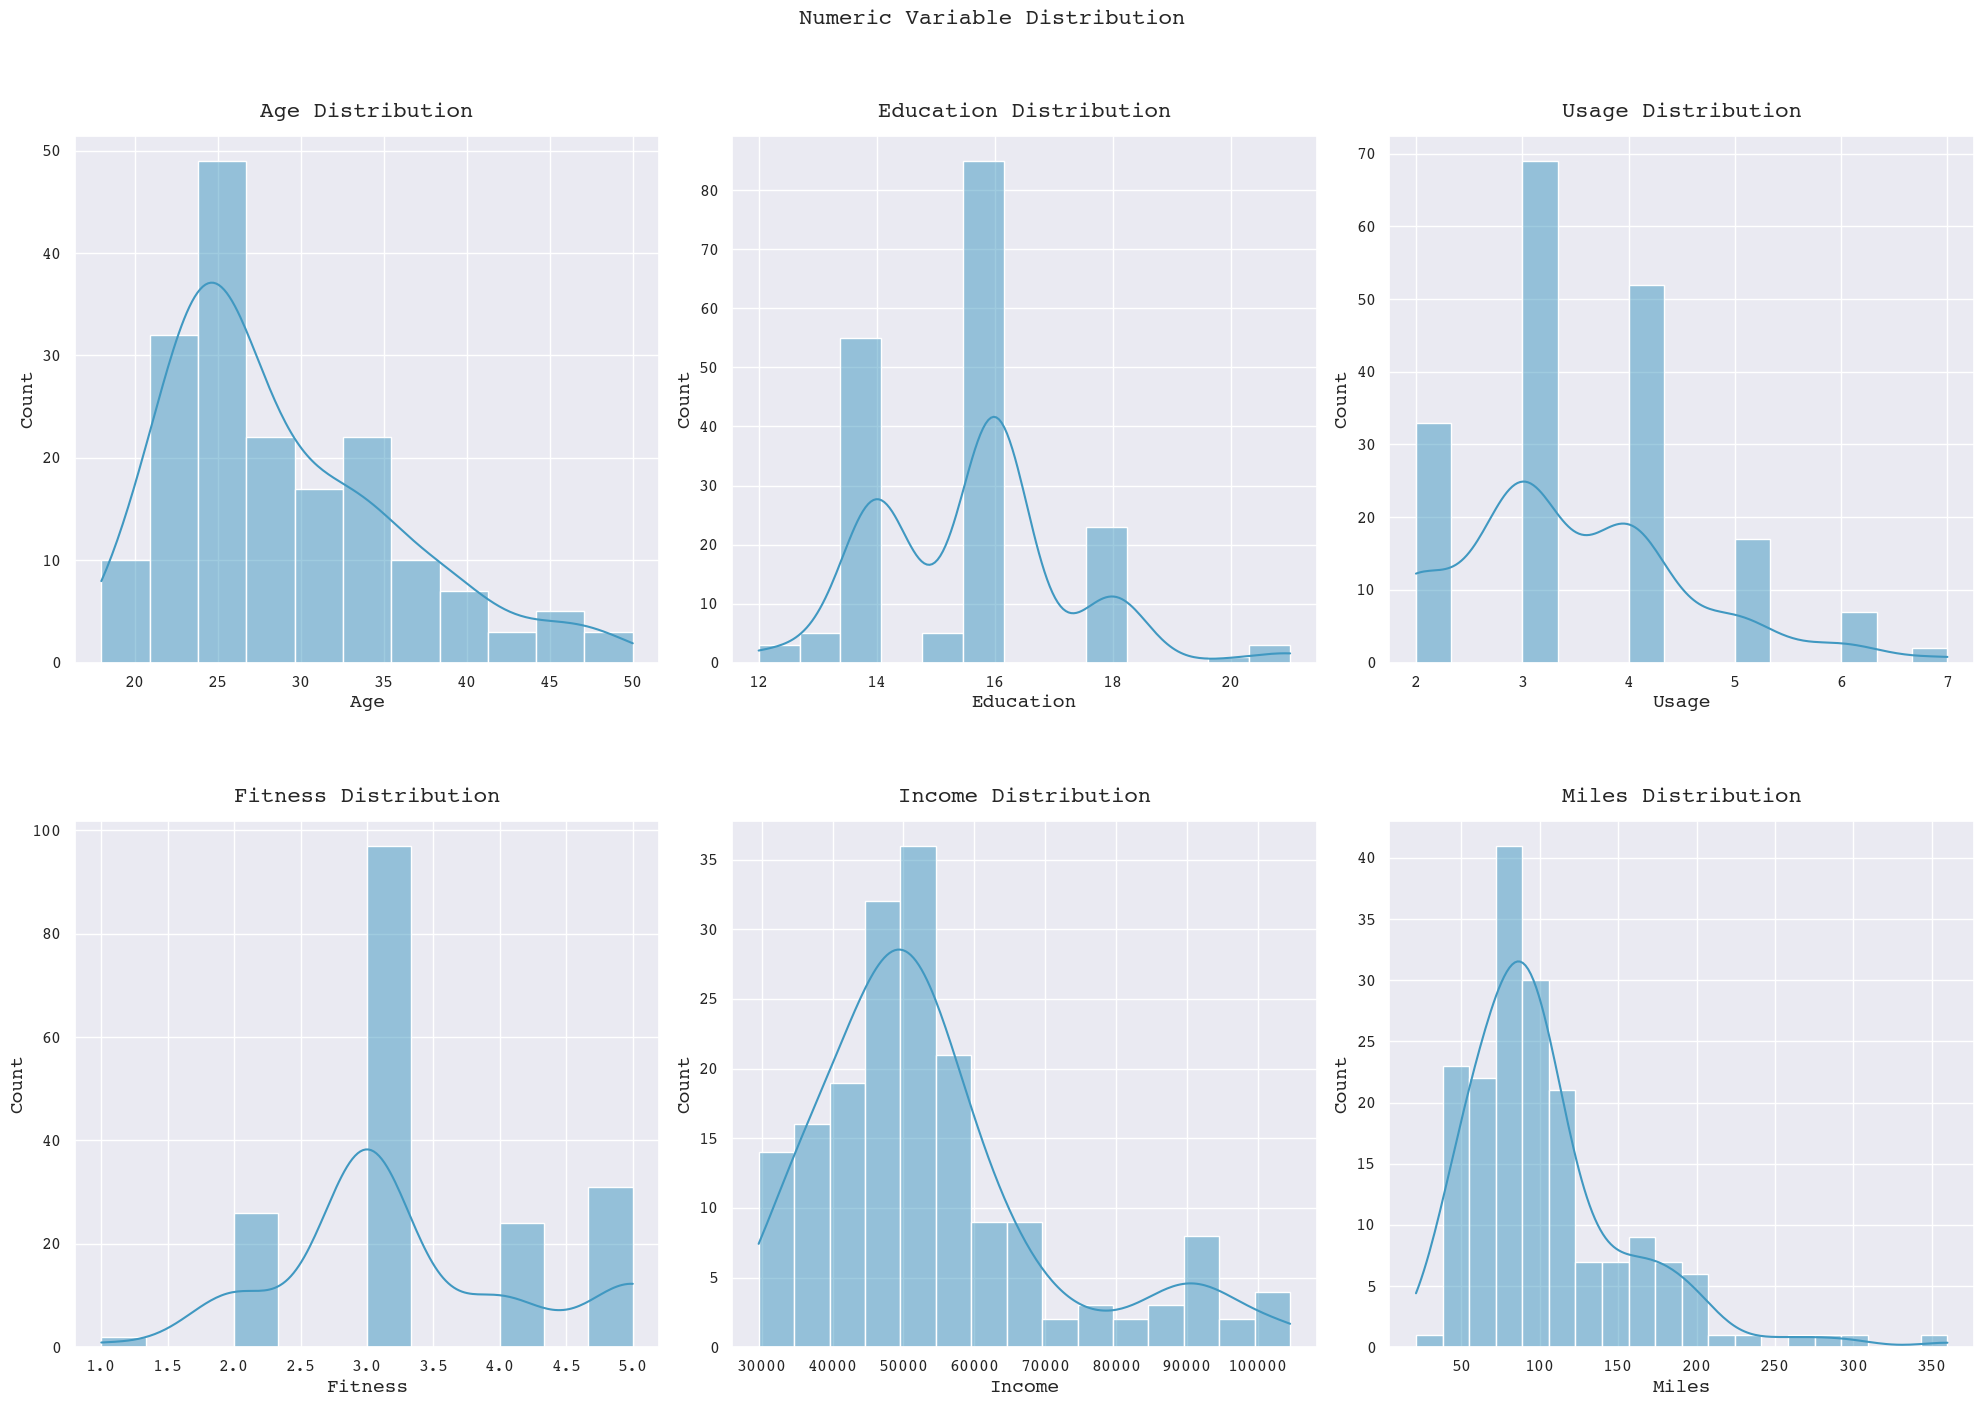

In [137]:
num_cols = df.select_dtypes(include='int64').columns
fig=plt.figure(figsize=(20,20)).suptitle("Numeric Variable Distribution", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
    plt.subplot(3,3,i+1)
    sns.histplot(df[num_cols[i]], kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title(num_cols[i]+" Distribution", y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

![](image-1.png)

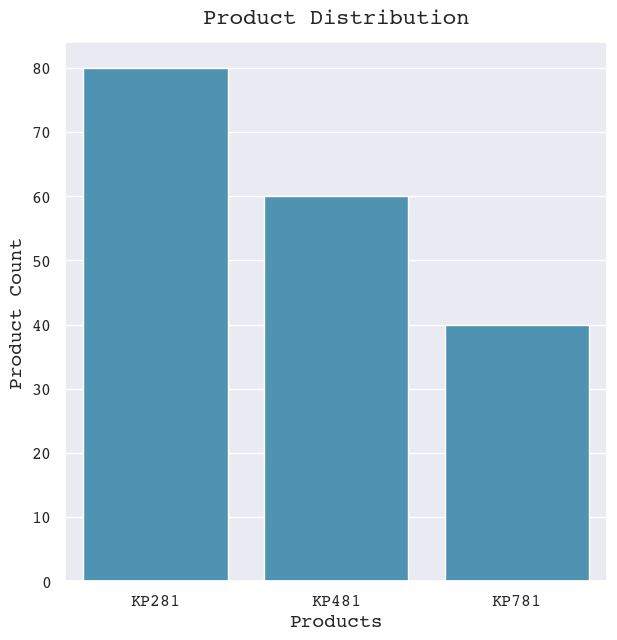

In [138]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Product")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Products", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Product Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

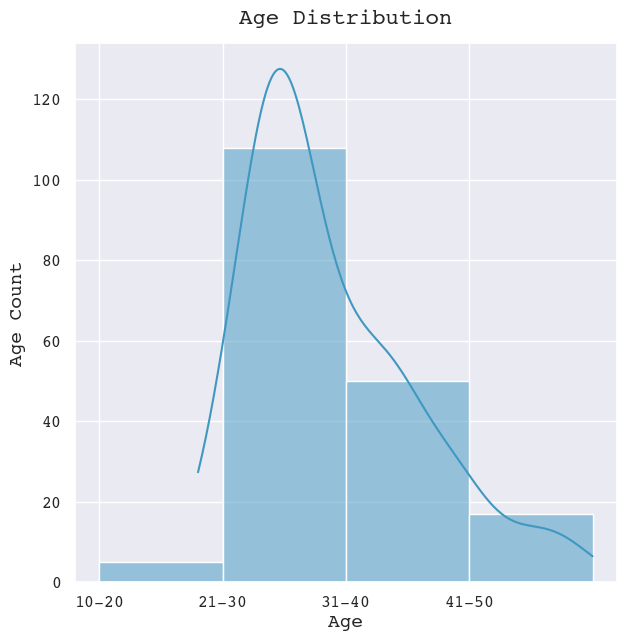

In [139]:
labels=["10-20", "21-30", "31-40", "41-50"]
bins = [10, 20, 30, 40, 50]
fig=plt.figure(figsize=(7,7))
sns.histplot(df["Age"], color=plot_palette[0], bins = bins, kde=True)
plt.xticks(bins[:-1], labels)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Age", fontsize = 14, fontname='Courier')
plt.ylabel("Age Count", fontsize = 14, fontname='Courier')
plt.title("Age Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

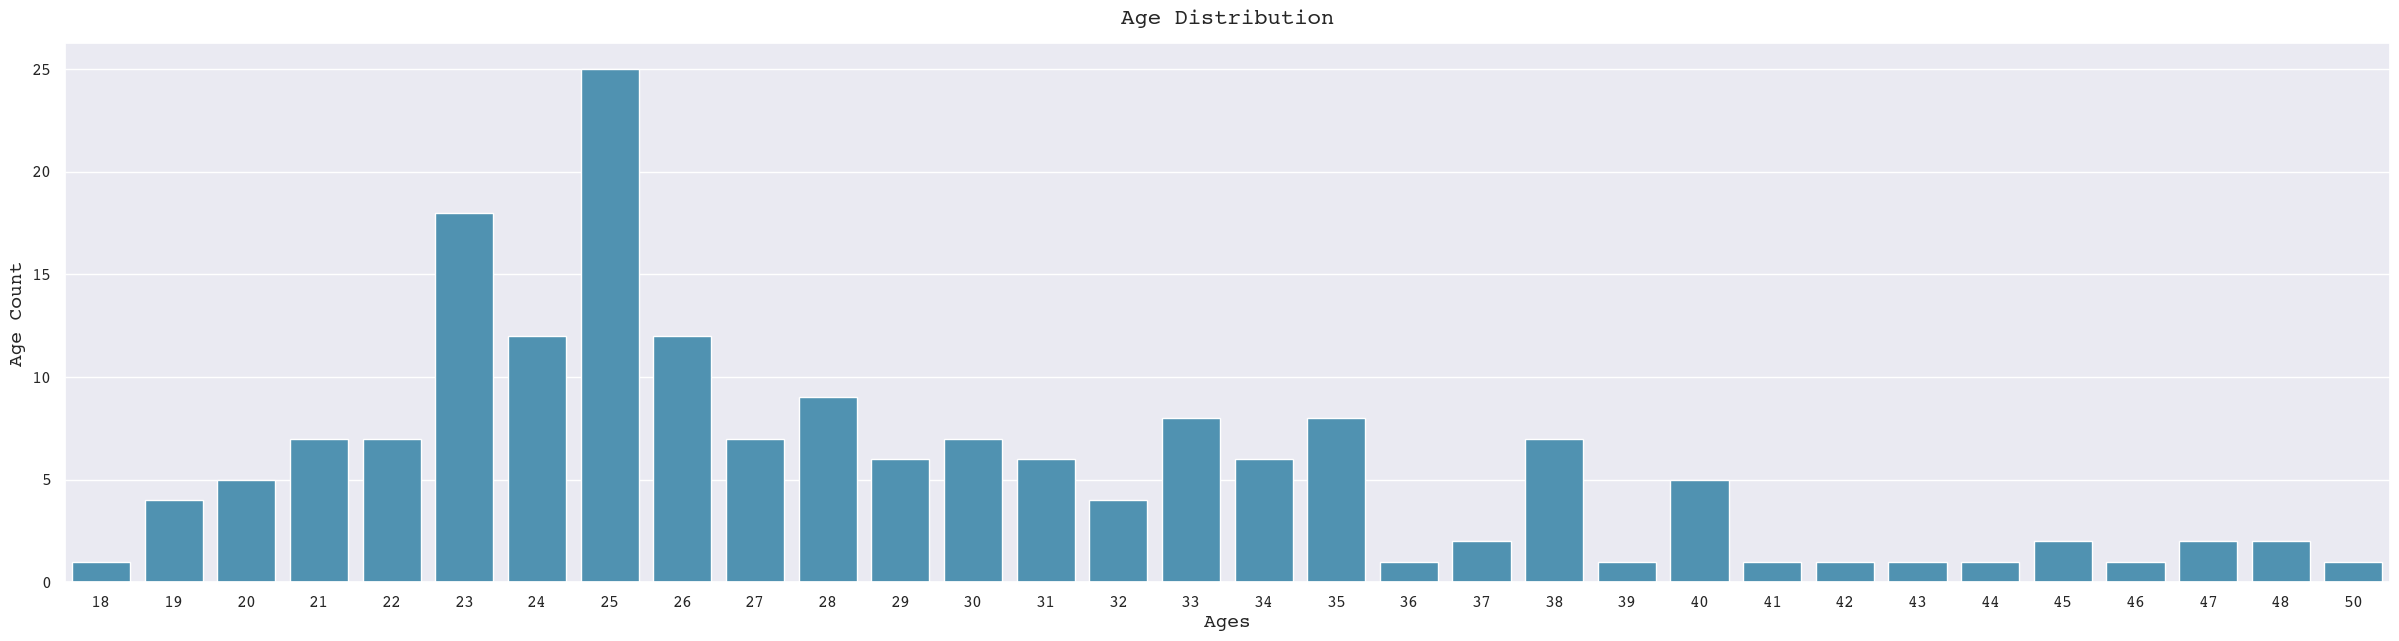

In [140]:
fig=plt.figure(figsize=(30,7))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Age")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Ages", fontsize = 14, fontname='Courier')
plt.ylabel("Age Count", fontsize = 14, fontname='Courier')
plt.title("Age Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

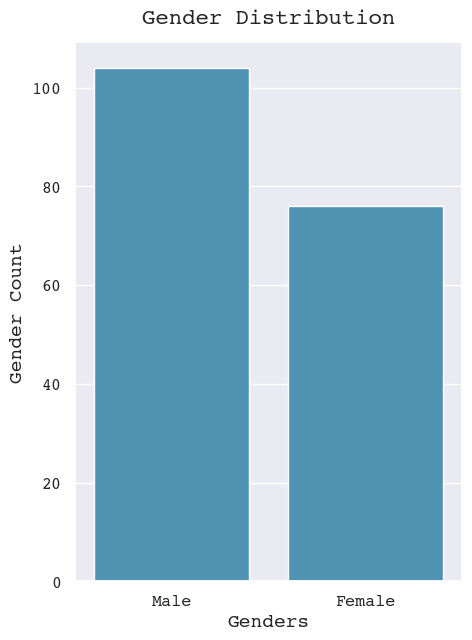

In [141]:
fig=plt.figure(figsize=(5,7))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Gender")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Genders", fontsize = 14, fontname='Courier')
plt.ylabel("Gender Count", fontsize = 14, fontname='Courier')
plt.title("Gender Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

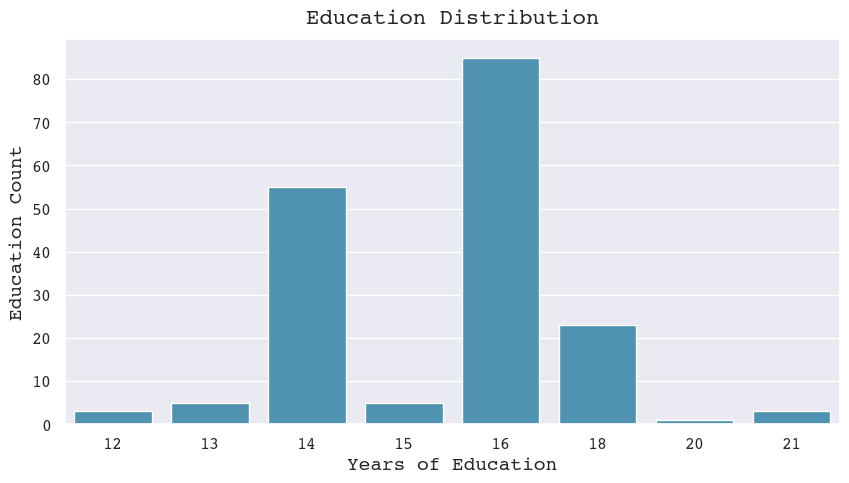

In [142]:
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Education")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Years of Education", fontsize = 14, fontname='Courier')
plt.ylabel("Education Count", fontsize = 14, fontname='Courier')
plt.title("Education Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

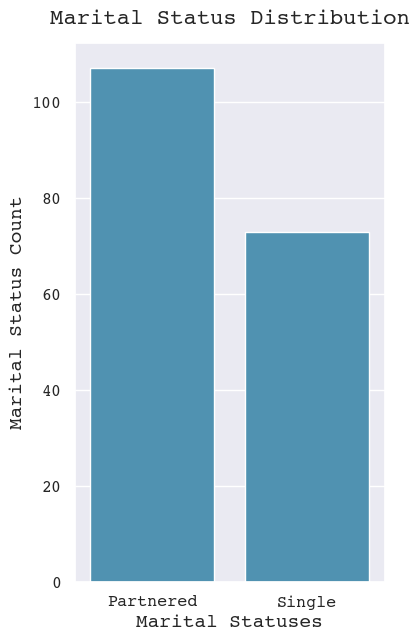

In [143]:
fig=plt.figure(figsize=(4,7))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"MaritalStatus")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Marital Statuses", fontsize = 14, fontname='Courier')
plt.ylabel("Marital Status Count", fontsize = 14, fontname='Courier')
plt.title("Marital Status Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

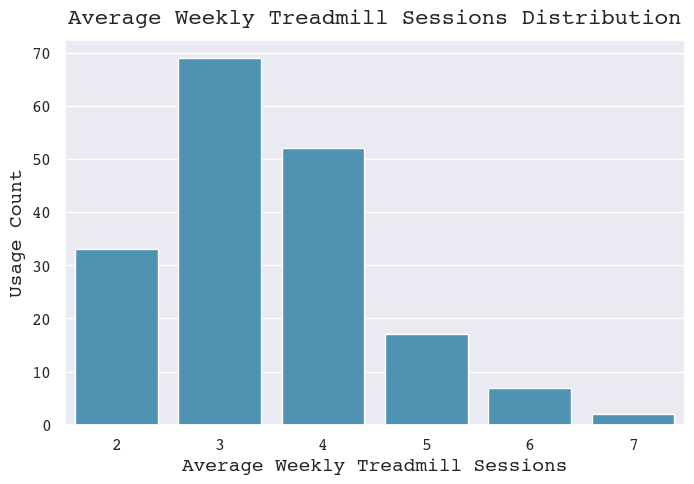

In [144]:
fig=plt.figure(figsize=(8,5))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Usage")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Average Weekly Treadmill Sessions", fontsize = 14, fontname='Courier')
plt.ylabel("Usage Count", fontsize = 14, fontname='Courier')
plt.title("Average Weekly Treadmill Sessions Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

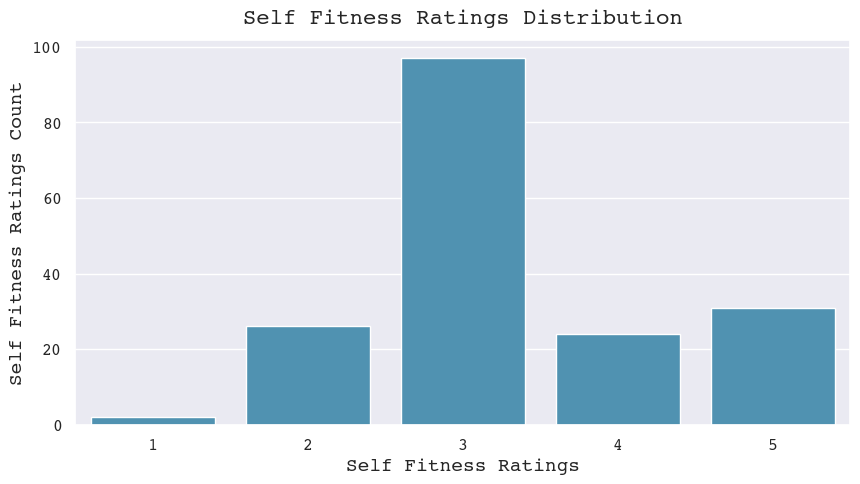

In [145]:
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
data_t = get_value_count_df(df,"Fitness")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Self Fitness Ratings", fontsize = 14, fontname='Courier')
plt.ylabel("Self Fitness Ratings Count", fontsize = 14, fontname='Courier')
plt.title("Self Fitness Ratings Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

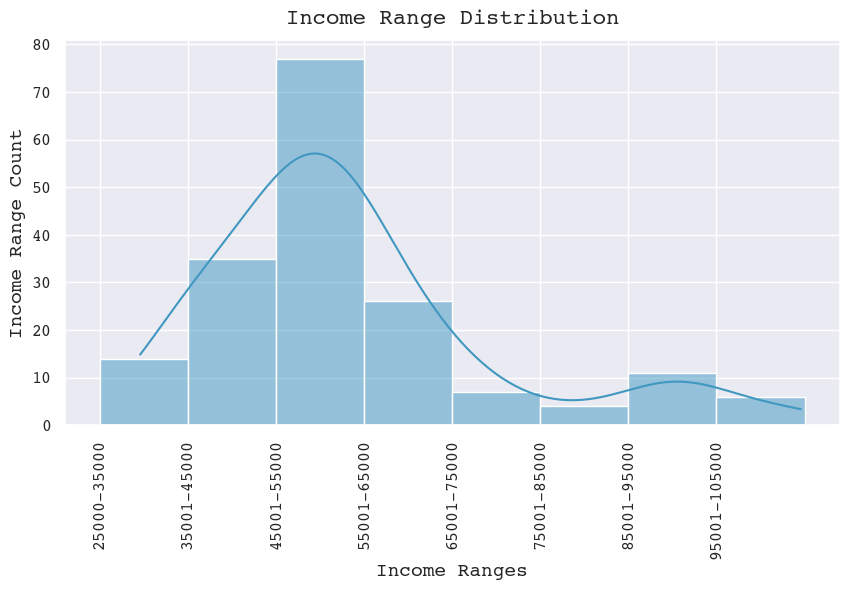

In [146]:
bins = [25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000]
labels=['25000-35000', '35001-45000', '45001-55000', '55001-65000', '65001-75000', '75001-85000', '85001-95000', '95001-105000']
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
sns.histplot(df["Income"], kde=True, bins = bins, color=plot_palette[0])
plt.xticks(bins[:-1], labels)
plt.xticks(fontsize = 12, fontname='Courier', rotation = 90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Income Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Income Range Count", fontsize = 14, fontname='Courier')
plt.title("Income Range Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

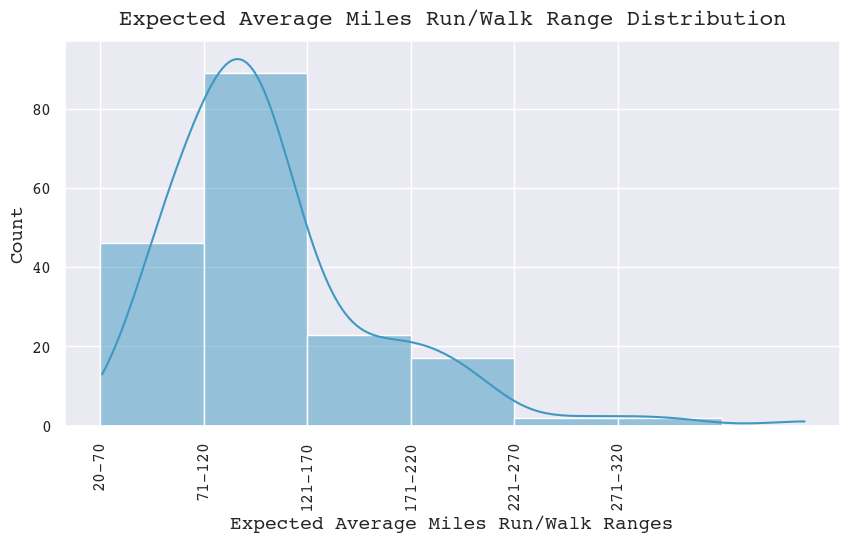

In [147]:
bins = [20, 70, 120, 170, 220, 270, 320]
labels=["20-70", "71-120", "121-170", "171-220", "221-270", "271-320"]
fig=plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
sns.histplot(df["Miles"], kde=True, bins = bins, color=plot_palette[0])
plt.xticks(bins[:-1], labels)
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Expected Average Miles Run/Walk Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Expected Average Miles Run/Walk Range Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [148]:
gender_df = df.groupby(["Product","Gender"])["Product"].aggregate(
    GenderProdCount = "count"
).reset_index()
gender_df

,Product,Gender,GenderProdCount
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


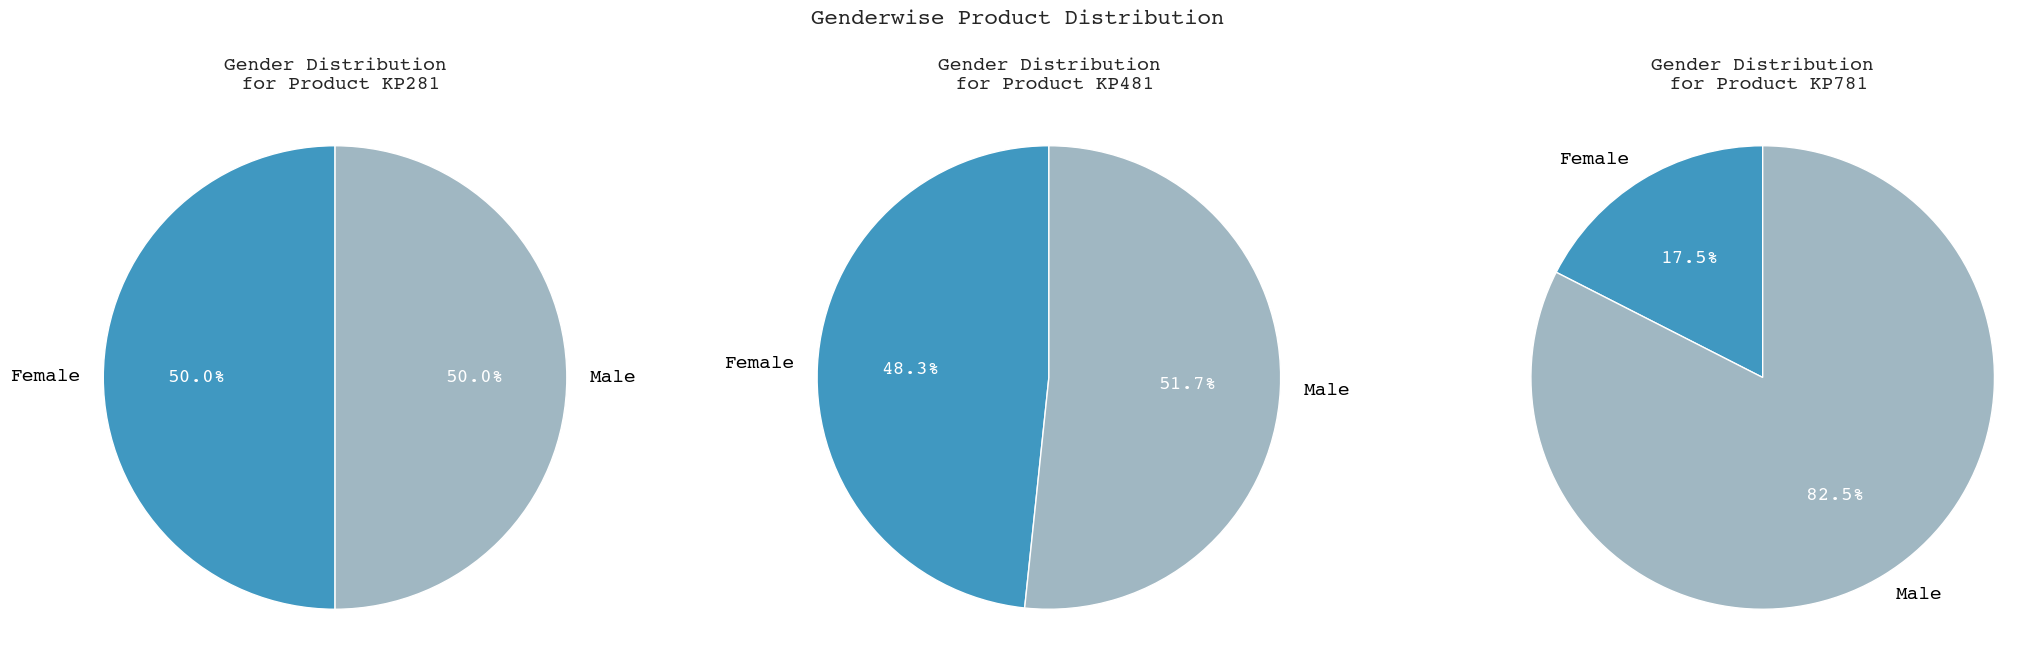

In [149]:
plt.figure(figsize=(25, 7)).suptitle("Genderwise Product Distribution", y=1.02, fontsize = 16, fontname='Courier')

for i in range(products.size):
    plt.subplot(1,3,i+1)
    t_data = gender_df.loc[gender_df["Product"] == products[i], ["Gender", "GenderProdCount"]]
    labels = t_data["Gender"]
    sizes = t_data["GenderProdCount"]
    colors = plot_palette[0:2]
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
    for autotext in autotexts:
        autotext.set_color('white')
    plt.axis('equal')
    plt.title("Gender Distribution\n for Product " + products[i], y=1.02, fontsize = 14, fontname='Courier')

plt.subplots_adjust(wspace=0.4) 
plt.show()


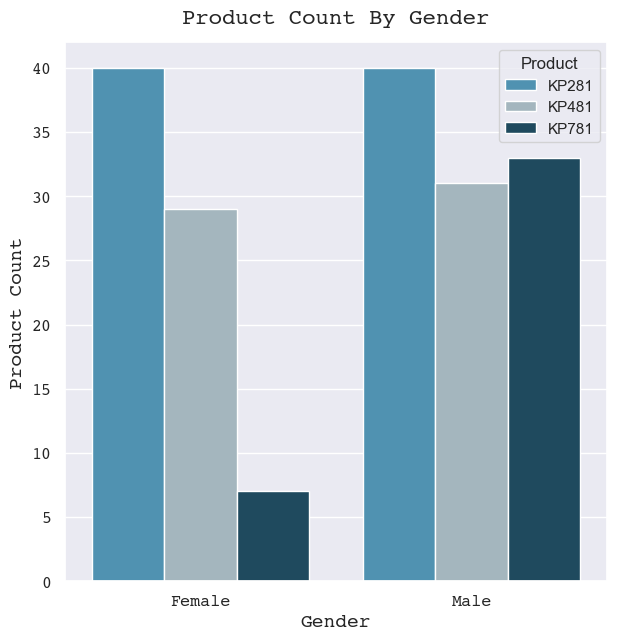

In [150]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=gender_df, x="Gender", y="GenderProdCount", hue="Product", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Gender", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Product Count By Gender", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [151]:
age_df = df.groupby(["Product","Age"])["Product"].aggregate(
    AgeProdCount = "count"
).reset_index()
age_df

,Product,Age,AgeProdCount
0,KP281,18,1
1,KP281,19,3
2,KP281,20,2
3,KP281,21,4
4,KP281,22,4
...,...,...,...
63,KP781,40,1
64,KP781,42,1
65,KP781,45,1
66,KP781,47,1


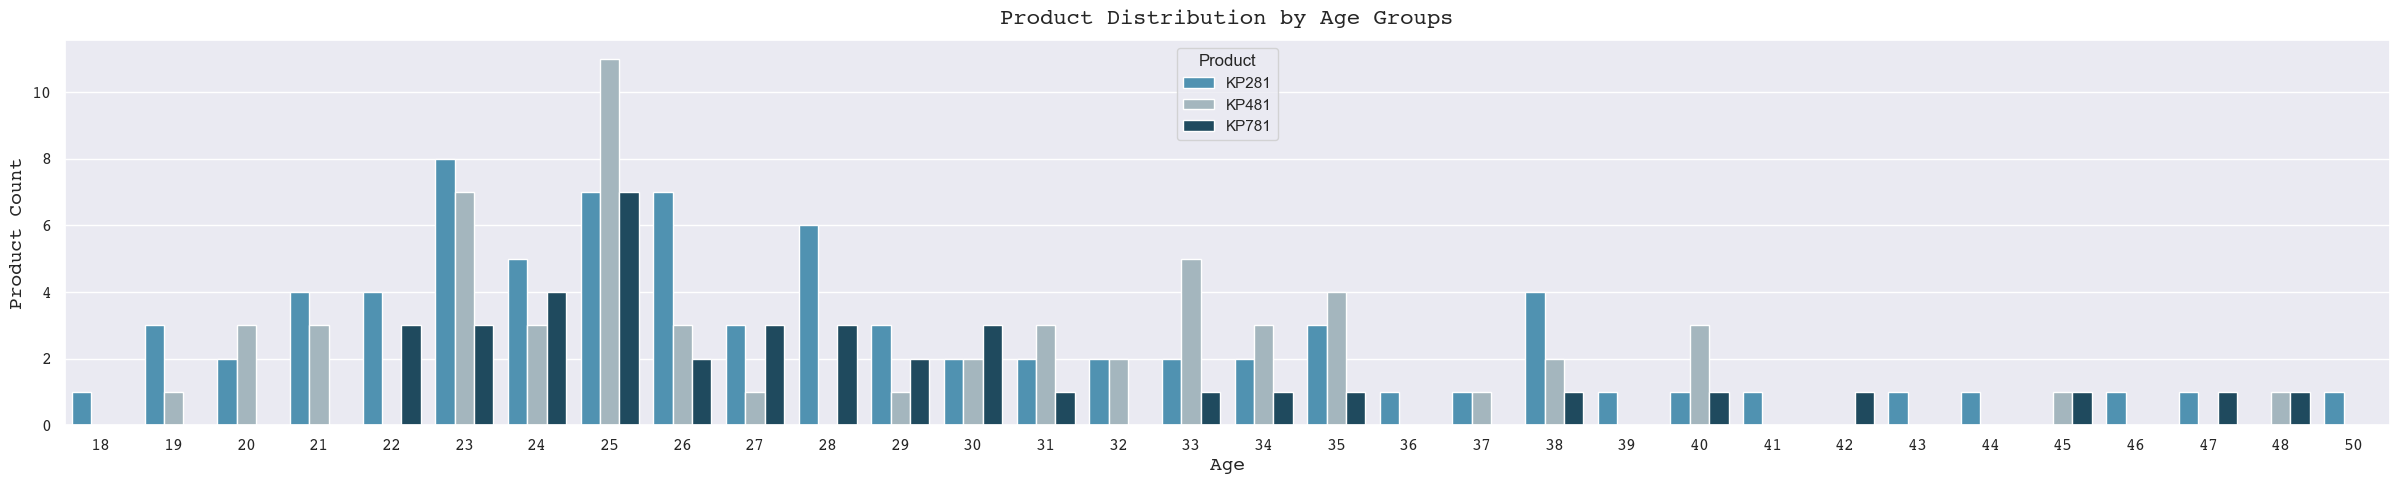

In [152]:
fig=plt.figure(figsize=(30,5))
sns.set(style = 'darkgrid')
sns.barplot(data=age_df, x="Age", y="AgeProdCount", palette=plot_palette, hue="Product")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Age", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Product Distribution by Age Groups", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

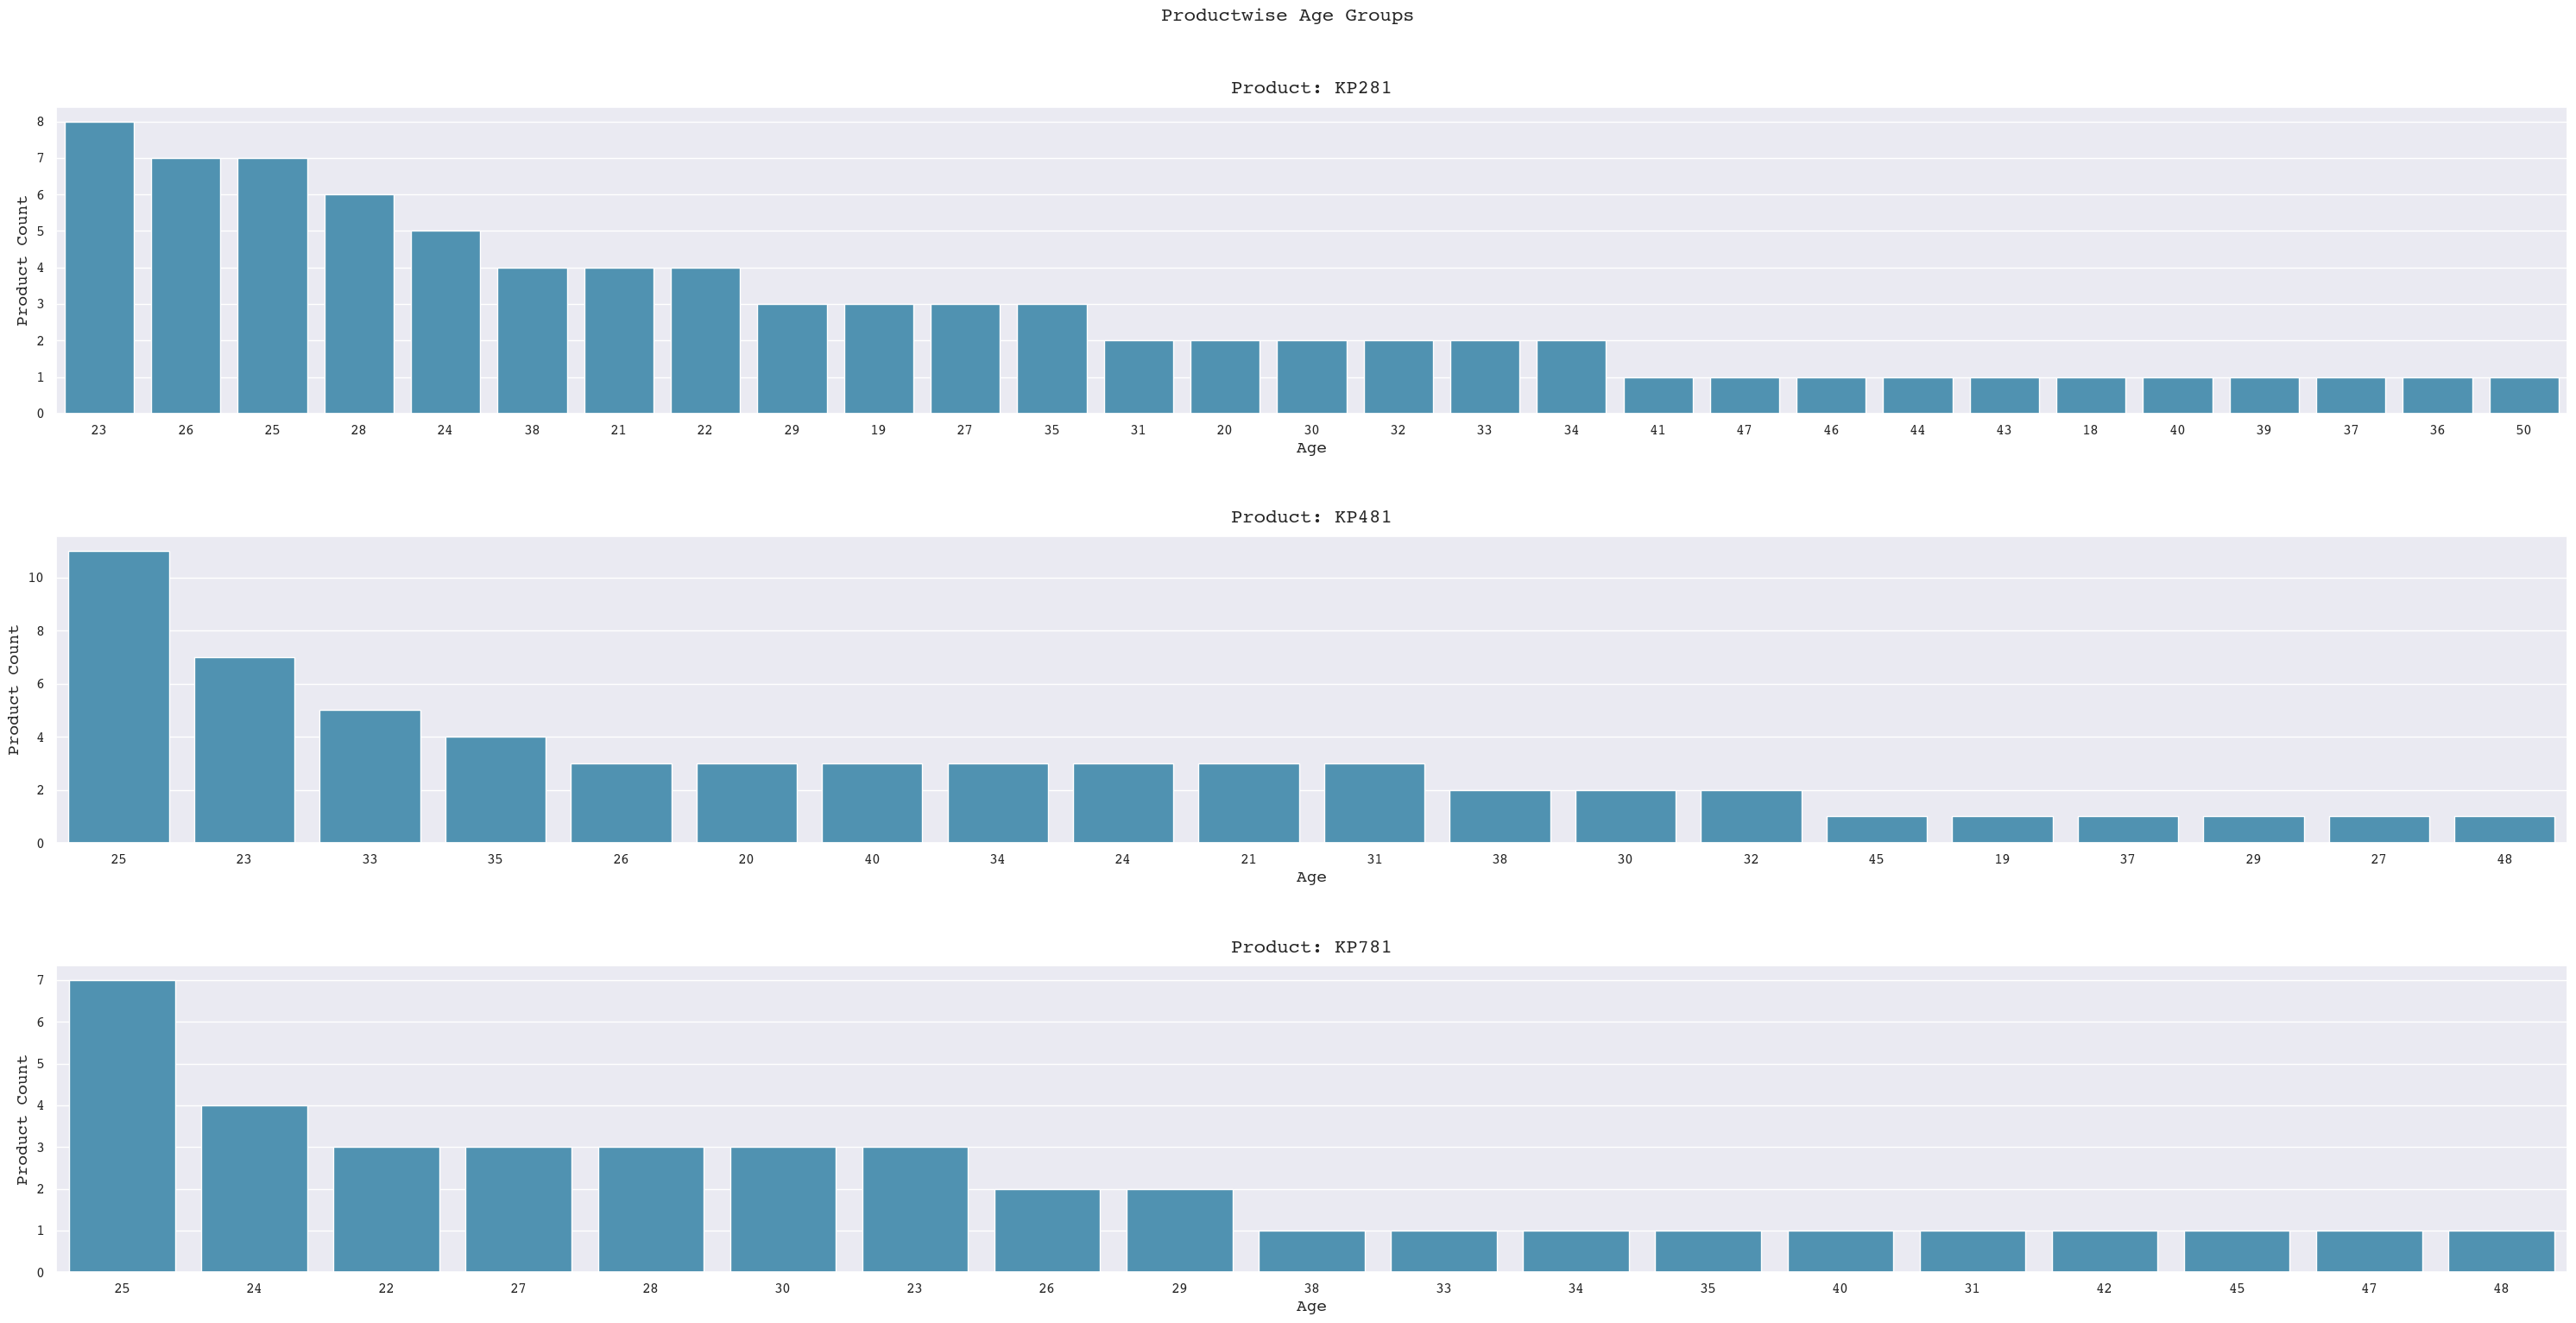

In [153]:
fig=plt.figure(figsize=(30,15)).suptitle("Productwise Age Groups", y=1.02, fontsize = 16, fontname='Courier')
for i in range(products.size):
    ax = plt.subplot(3, 1, i+1)
    sns.set(style = 'darkgrid')
    t_data = age_df.loc[age_df["Product"] == products[i]].sort_values("AgeProdCount", ascending=False)
    prod_count_order = t_data.sort_values("AgeProdCount", ascending=False).Age
    sns.barplot(data=t_data, x="Age", y="AgeProdCount", color=plot_palette[0], order = prod_count_order)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Age", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) 
plt.show()

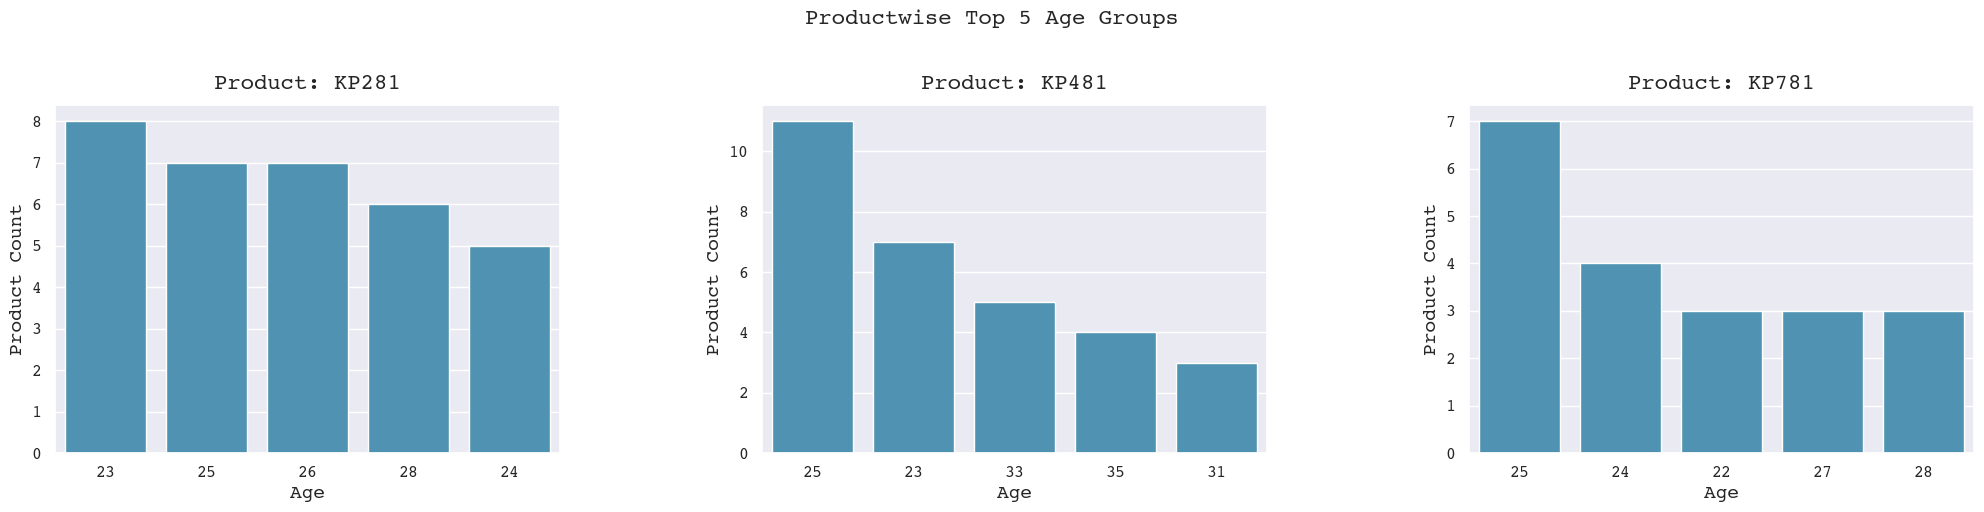

In [154]:
fig=plt.figure(figsize=(20,5)).suptitle("Productwise Top 5 Age Groups", y=1.02, fontsize = 16, fontname='Courier')
for i in range(products.size):
    plt.subplot(1, 3, i+1)
    sns.set(style = 'darkgrid')
    t_data = age_df.loc[age_df["Product"] == products[i]].sort_values("AgeProdCount", ascending=False).iloc[0:5,:]
    prod_count_order = t_data.sort_values("AgeProdCount", ascending=False).Age
    sns.barplot(data=t_data, x="Age", y="AgeProdCount", color=plot_palette[0], order = prod_count_order)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Age", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()

In [155]:
education_df = df.groupby(["Product","Education"])["Product"].aggregate(
    EducationProdCount = "count"
).reset_index()
education_df

,Product,Education,EducationProdCount
0,KP281,12,2
1,KP281,13,3
2,KP281,14,30
3,KP281,15,4
4,KP281,16,39
5,KP281,18,2
6,KP481,12,1
7,KP481,13,2
8,KP481,14,23
9,KP481,15,1


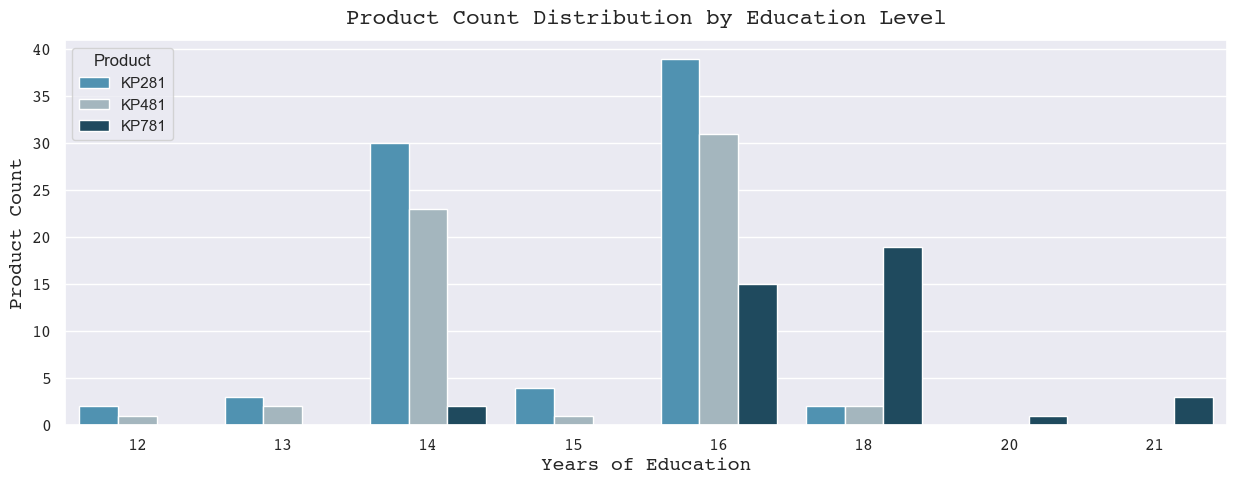

In [156]:
fig=plt.figure(figsize=(15,5))
sns.set(style = 'darkgrid')
sns.barplot(data=education_df, x="Education", y="EducationProdCount", palette=plot_palette, hue="Product")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Years of Education", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Product Count Distribution by Education Level", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

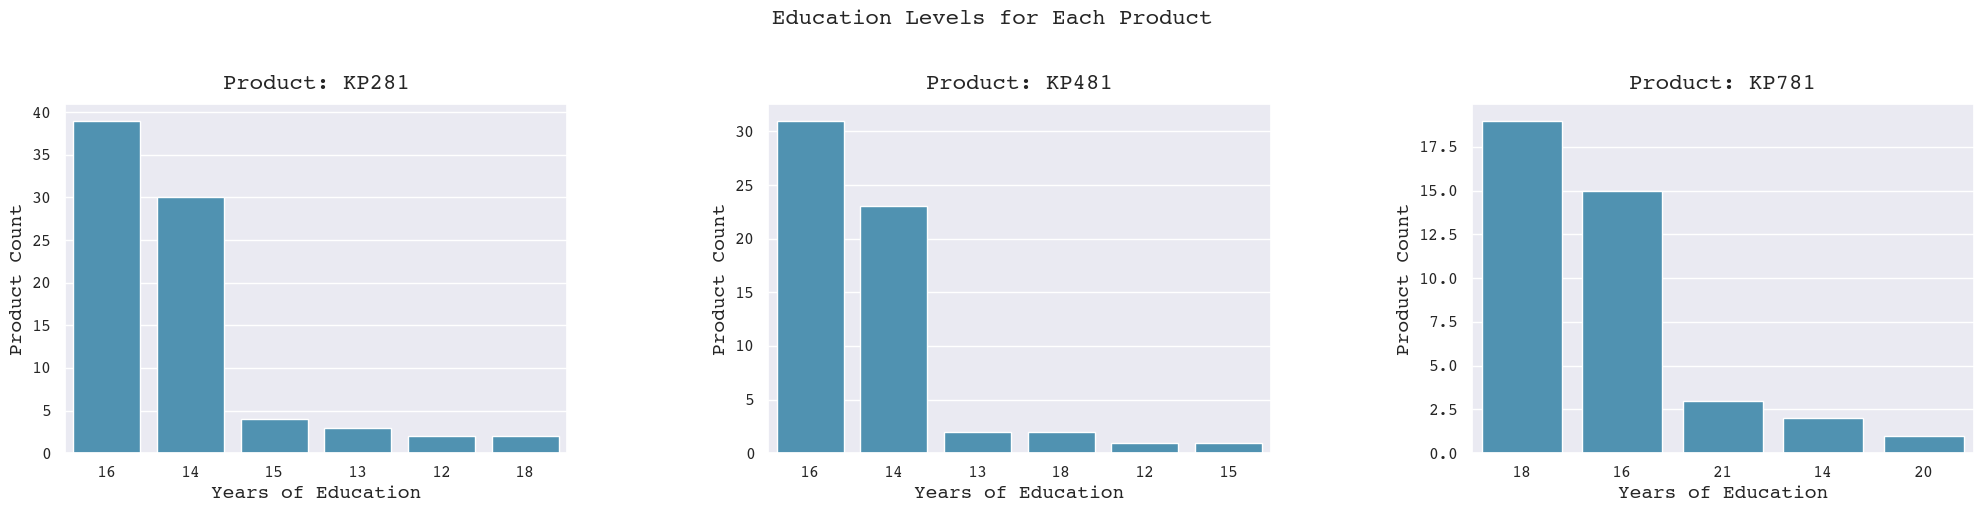

In [157]:
fig=plt.figure(figsize=(20,5)).suptitle("Education Levels for Each Product", y=1.02, fontsize = 16, fontname='Courier')
for i in range(products.size):
    ax = plt.subplot(1, 3, i+1)
    sns.set(style = 'darkgrid')
    t_data = education_df.loc[education_df["Product"] == products[i]].sort_values("EducationProdCount", ascending=False)
    prod_count_order = t_data.sort_values("EducationProdCount", ascending=False).Education
    sns.barplot(data=t_data, x="Education", y="EducationProdCount", color=plot_palette[0], order = prod_count_order)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Years of Education", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()

In [158]:
marital_status_df = df.groupby(["Product","MaritalStatus"])["Product"].aggregate(
    MaritalStatusProdCount = "count"
).reset_index()
marital_status_df

,Product,MaritalStatus,MaritalStatusProdCount
0,KP281,Partnered,48
1,KP281,Single,32
2,KP481,Partnered,36
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


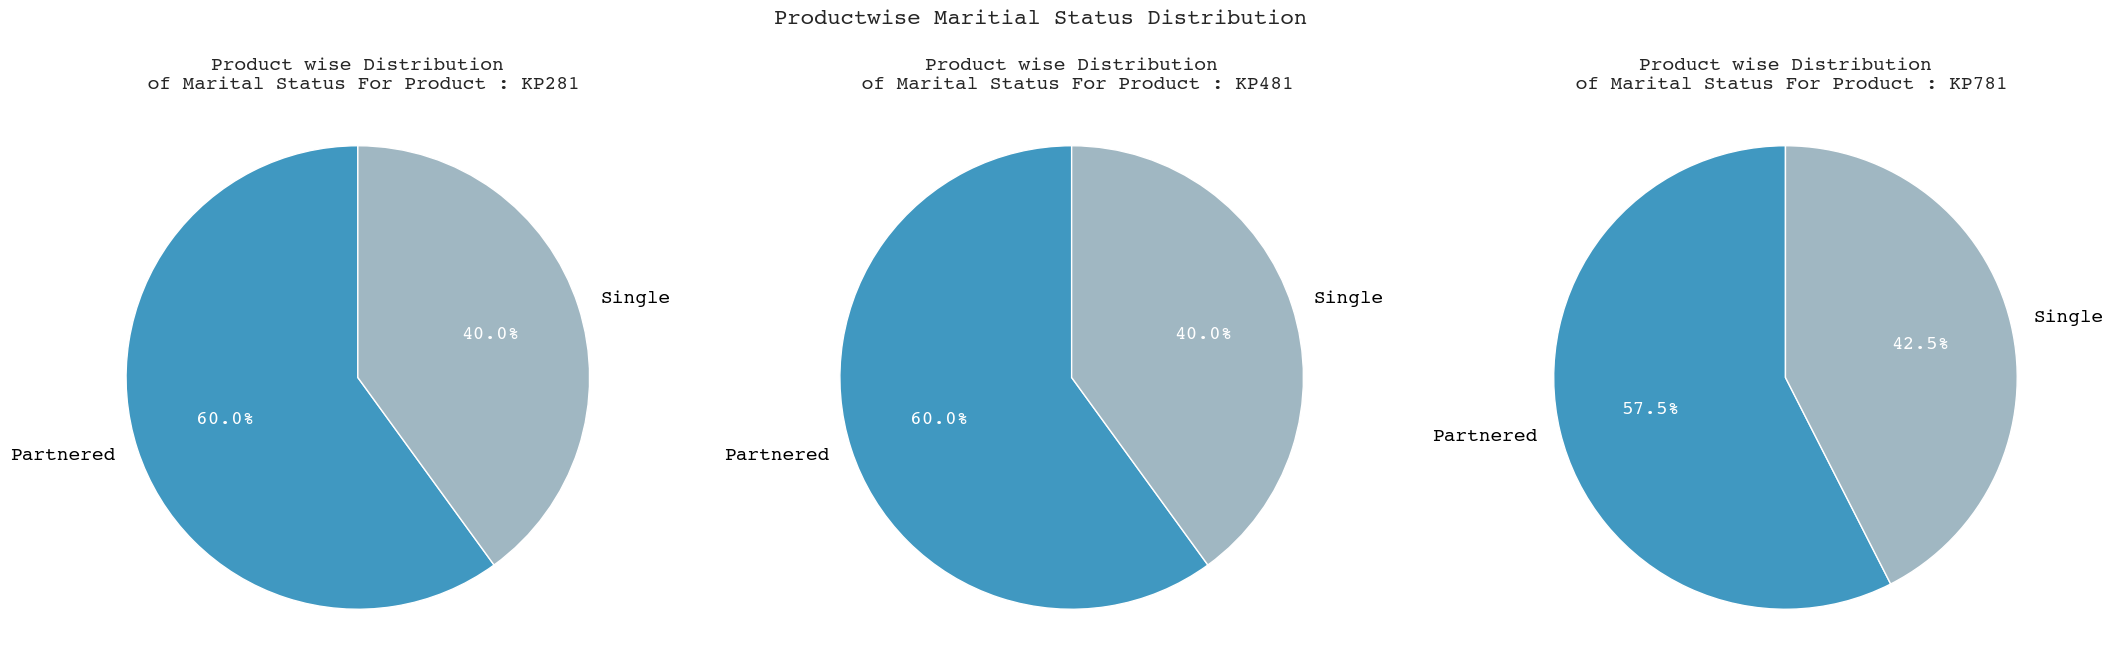

In [159]:
plt.figure(figsize=(25, 7)).suptitle("Productwise Maritial Status Distribution", y=1.02, fontsize = 16, fontname='Courier')

for i in range(products.size):
    plt.subplot(1,3,i+1)
    t_data = marital_status_df.loc[marital_status_df["Product"] == products[i], ["MaritalStatus", "MaritalStatusProdCount"]]
    labels = t_data["MaritalStatus"]
    sizes = t_data["MaritalStatusProdCount"]
    colors = plot_palette[0:2]
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
    for autotext in autotexts:
        autotext.set_color('white')
    plt.axis('equal')
    plt.title("Product wise Distribution\n of Marital Status For Product : " + products[i], y=1.02, fontsize = 14, fontname='Courier')

plt.subplots_adjust(wspace=0.4) 
plt.show()


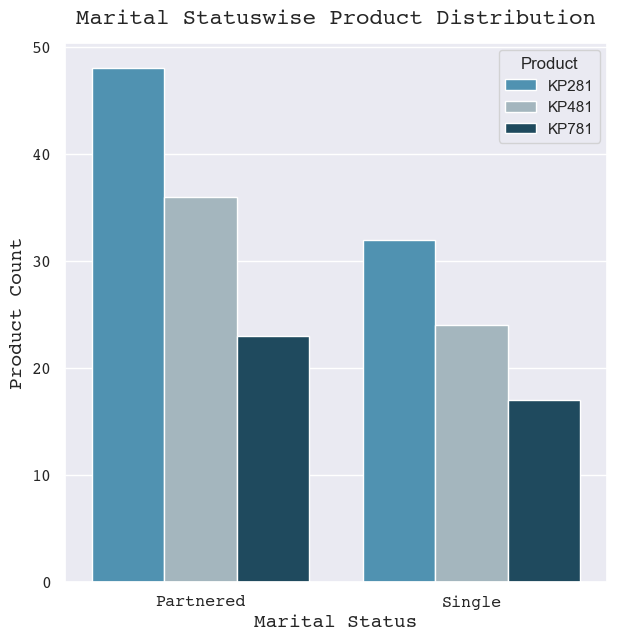

In [160]:
fig=plt.figure(figsize=(7,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=marital_status_df, x="MaritalStatus", y="MaritalStatusProdCount", hue="Product", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Marital Status", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Marital Statuswise Product Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [161]:
usage_status_df = df.groupby(["Product","Usage"])["Product"].aggregate(
    UsageProdCount = "count"
).reset_index()
usage_status_df

,Product,Usage,UsageProdCount
0,KP281,2,19
1,KP281,3,37
2,KP281,4,22
3,KP281,5,2
4,KP481,2,14
5,KP481,3,31
6,KP481,4,12
7,KP481,5,3
8,KP781,3,1
9,KP781,4,18


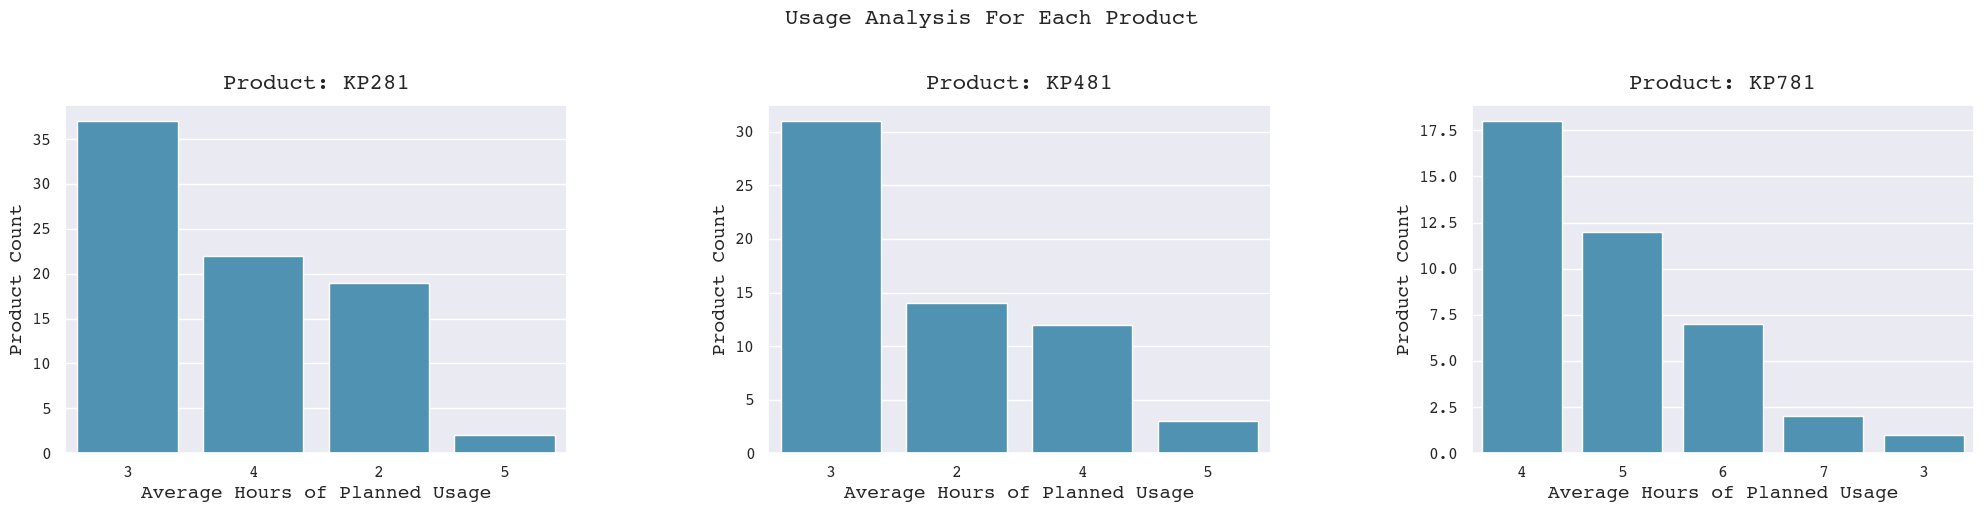

In [162]:
fig=plt.figure(figsize=(20,5)).suptitle("Usage Analysis For Each Product", y=1.02, fontsize = 16, fontname='Courier')
for i in range(products.size):
    ax = plt.subplot(1, 3, i+1)
    sns.set(style = 'darkgrid')
    t_data = usage_status_df.loc[usage_status_df["Product"] == products[i]].sort_values("UsageProdCount", ascending=False)
    prod_count_order = t_data.sort_values("UsageProdCount", ascending=False).Usage
    sns.barplot(data=t_data, x="Usage", y="UsageProdCount", color=plot_palette[0], order = prod_count_order)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Average Hours of Planned Usage", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()

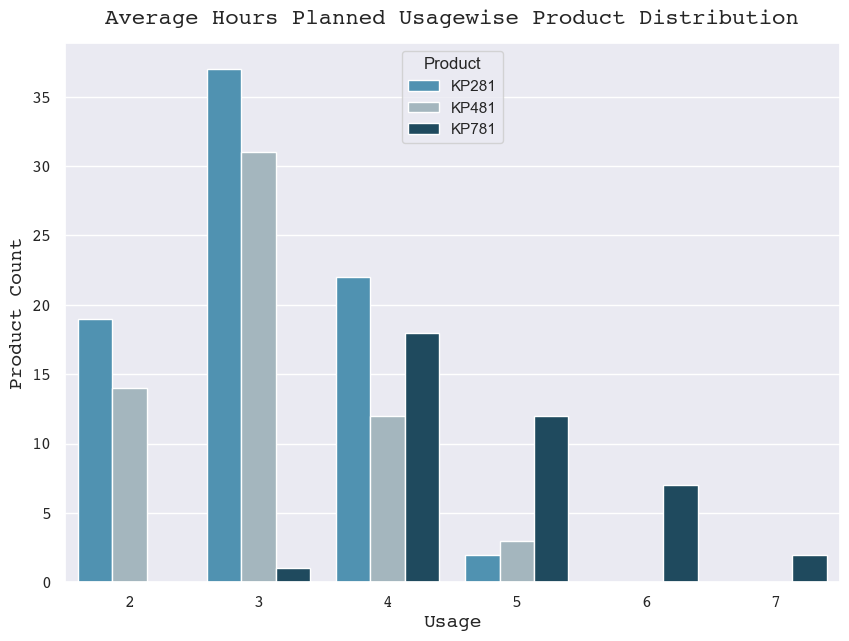

In [163]:
fig=plt.figure(figsize=(10,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=usage_status_df, x="Usage", y="UsageProdCount", hue="Product", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Usage", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Average Hours Planned Usagewise Product Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [164]:
fitness_status_df = df.groupby(["Product","Fitness"])["Product"].aggregate(
    FitnessProdCount = "count"
).reset_index()
fitness_status_df

,Product,Fitness,FitnessProdCount
0,KP281,1,1
1,KP281,2,14
2,KP281,3,54
3,KP281,4,9
4,KP281,5,2
5,KP481,1,1
6,KP481,2,12
7,KP481,3,39
8,KP481,4,8
9,KP781,3,4


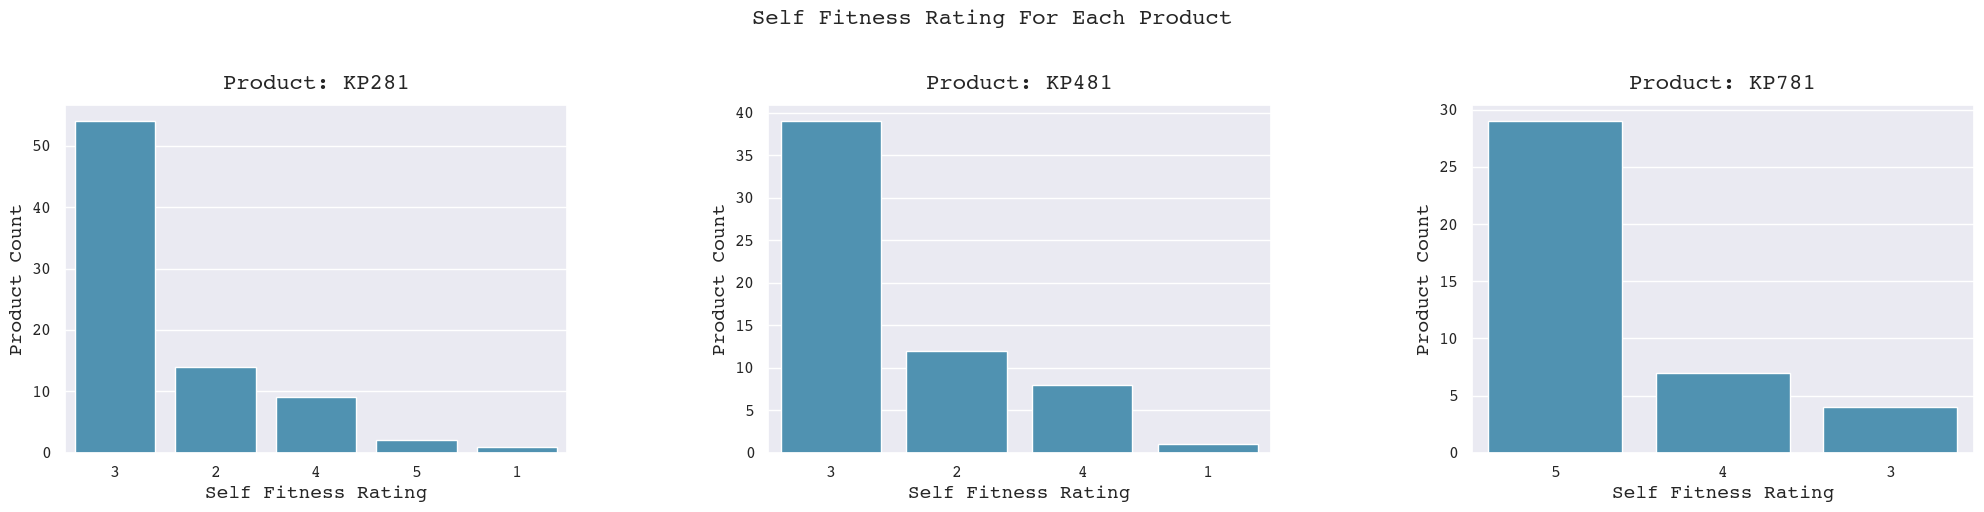

In [165]:
fig=plt.figure(figsize=(20,5)).suptitle("Self Fitness Rating For Each Product", y=1.02, fontsize = 16, fontname='Courier')
for i in range(products.size):
    ax = plt.subplot(1, 3, i+1)
    sns.set(style = 'darkgrid')
    t_data = fitness_status_df.loc[fitness_status_df["Product"] == products[i]].sort_values("FitnessProdCount", ascending=False)
    prod_count_order = t_data.sort_values("FitnessProdCount", ascending=False).Fitness
    sns.barplot(data=t_data, x="Fitness", y="FitnessProdCount", color=plot_palette[0], order = prod_count_order)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Self Fitness Rating", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()

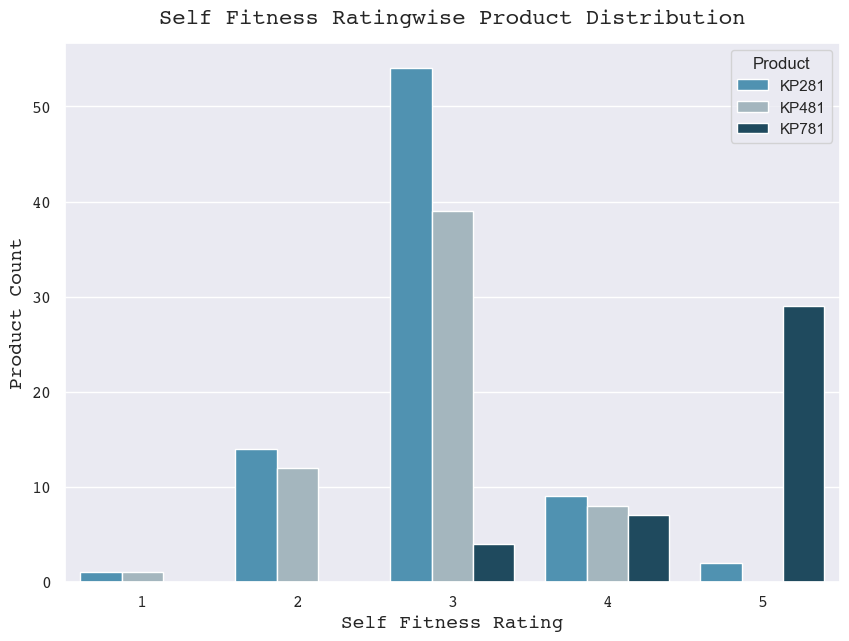

In [166]:
fig=plt.figure(figsize=(10,7))
sns.set(style = 'darkgrid')
ax = sns.barplot(data=fitness_status_df, x="Fitness", y="FitnessProdCount", hue="Product", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Self Fitness Rating", fontsize = 14, fontname='Courier')
plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
plt.title("Self Fitness Ratingwise Product Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

In [167]:
income_df = df.groupby(["Product","Income"])["Product"].aggregate(
    IncomeProdCount = "count"
).reset_index()
income_df

,Product,Income,IncomeProdCount
0,KP281,29562,1
1,KP281,30699,1
2,KP281,31836,1
3,KP281,32973,3
4,KP281,34110,2
...,...,...,...
78,KP781,95508,1
79,KP781,95866,1
80,KP781,99601,1
81,KP781,103336,1


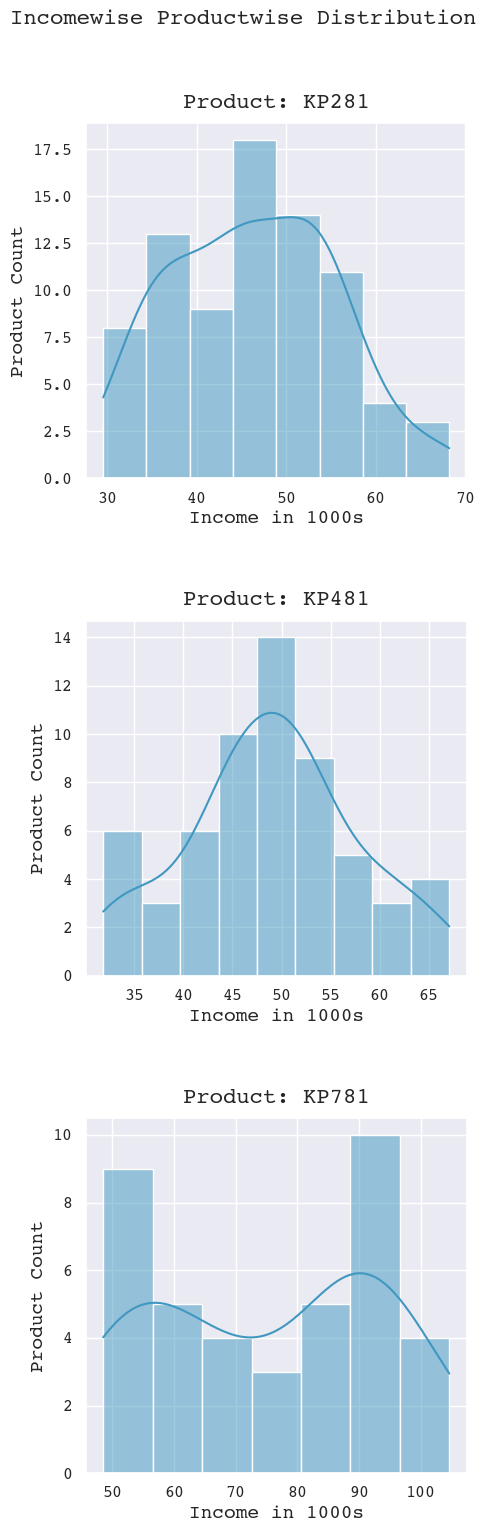

In [168]:
fig=plt.figure(figsize=(5,15)).suptitle("Incomewise Productwise Distribution", y=1.02, fontsize = 16, fontname='Courier')

for i in range(products.size):
    plt.subplot(3,1,i+1)
    sns.histplot(df.loc[df["Product"] == products[i], "Income"]/1000, kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Income in 1000s", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) 
plt.show()

In [169]:
miles_df = df.groupby(["Product","Miles"])["Product"].aggregate(
    MilesProdCount = "count"
).reset_index()
miles_df

,Product,Miles,MilesProdCount
0,KP281,38,3
1,KP281,47,9
2,KP281,56,6
3,KP281,66,10
4,KP281,75,10
5,KP281,85,16
6,KP281,94,8
7,KP281,103,3
8,KP281,112,1
9,KP281,113,8


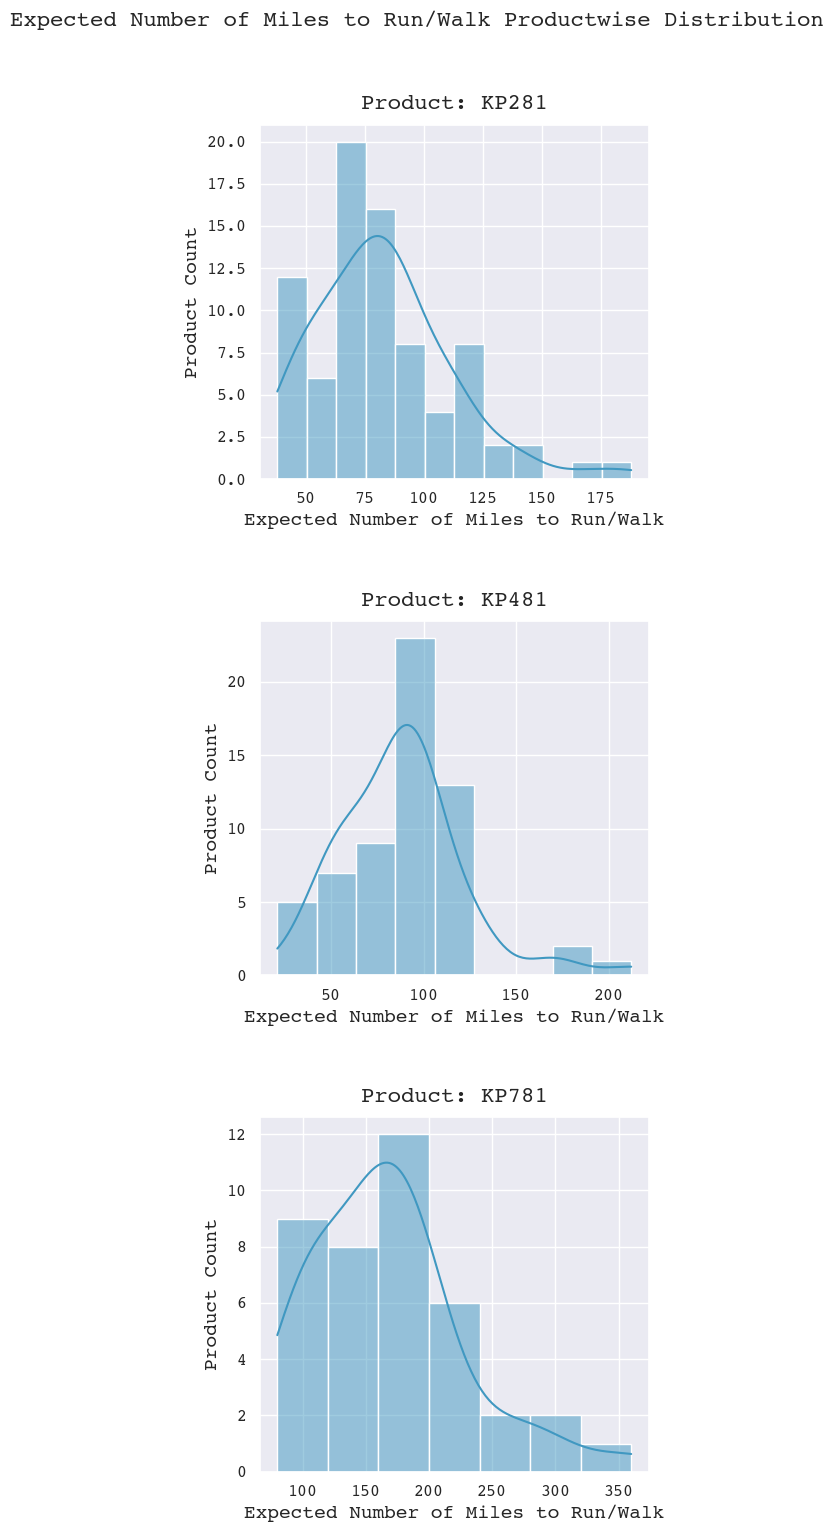

In [170]:
fig=plt.figure(figsize=(5,15)).suptitle("Expected Number of Miles to Run/Walk Productwise Distribution", y=1.02, fontsize = 16, fontname='Courier')

for i in range(products.size):
    plt.subplot(3,1,i+1)
    sns.histplot(df.loc[df["Product"] == products[i], "Miles"], kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Expected Number of Miles to Run/Walk", fontsize = 14, fontname='Courier')
    plt.ylabel("Product Count", fontsize = 14, fontname='Courier')
    plt.title("Product: " + products[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) 
plt.show()

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


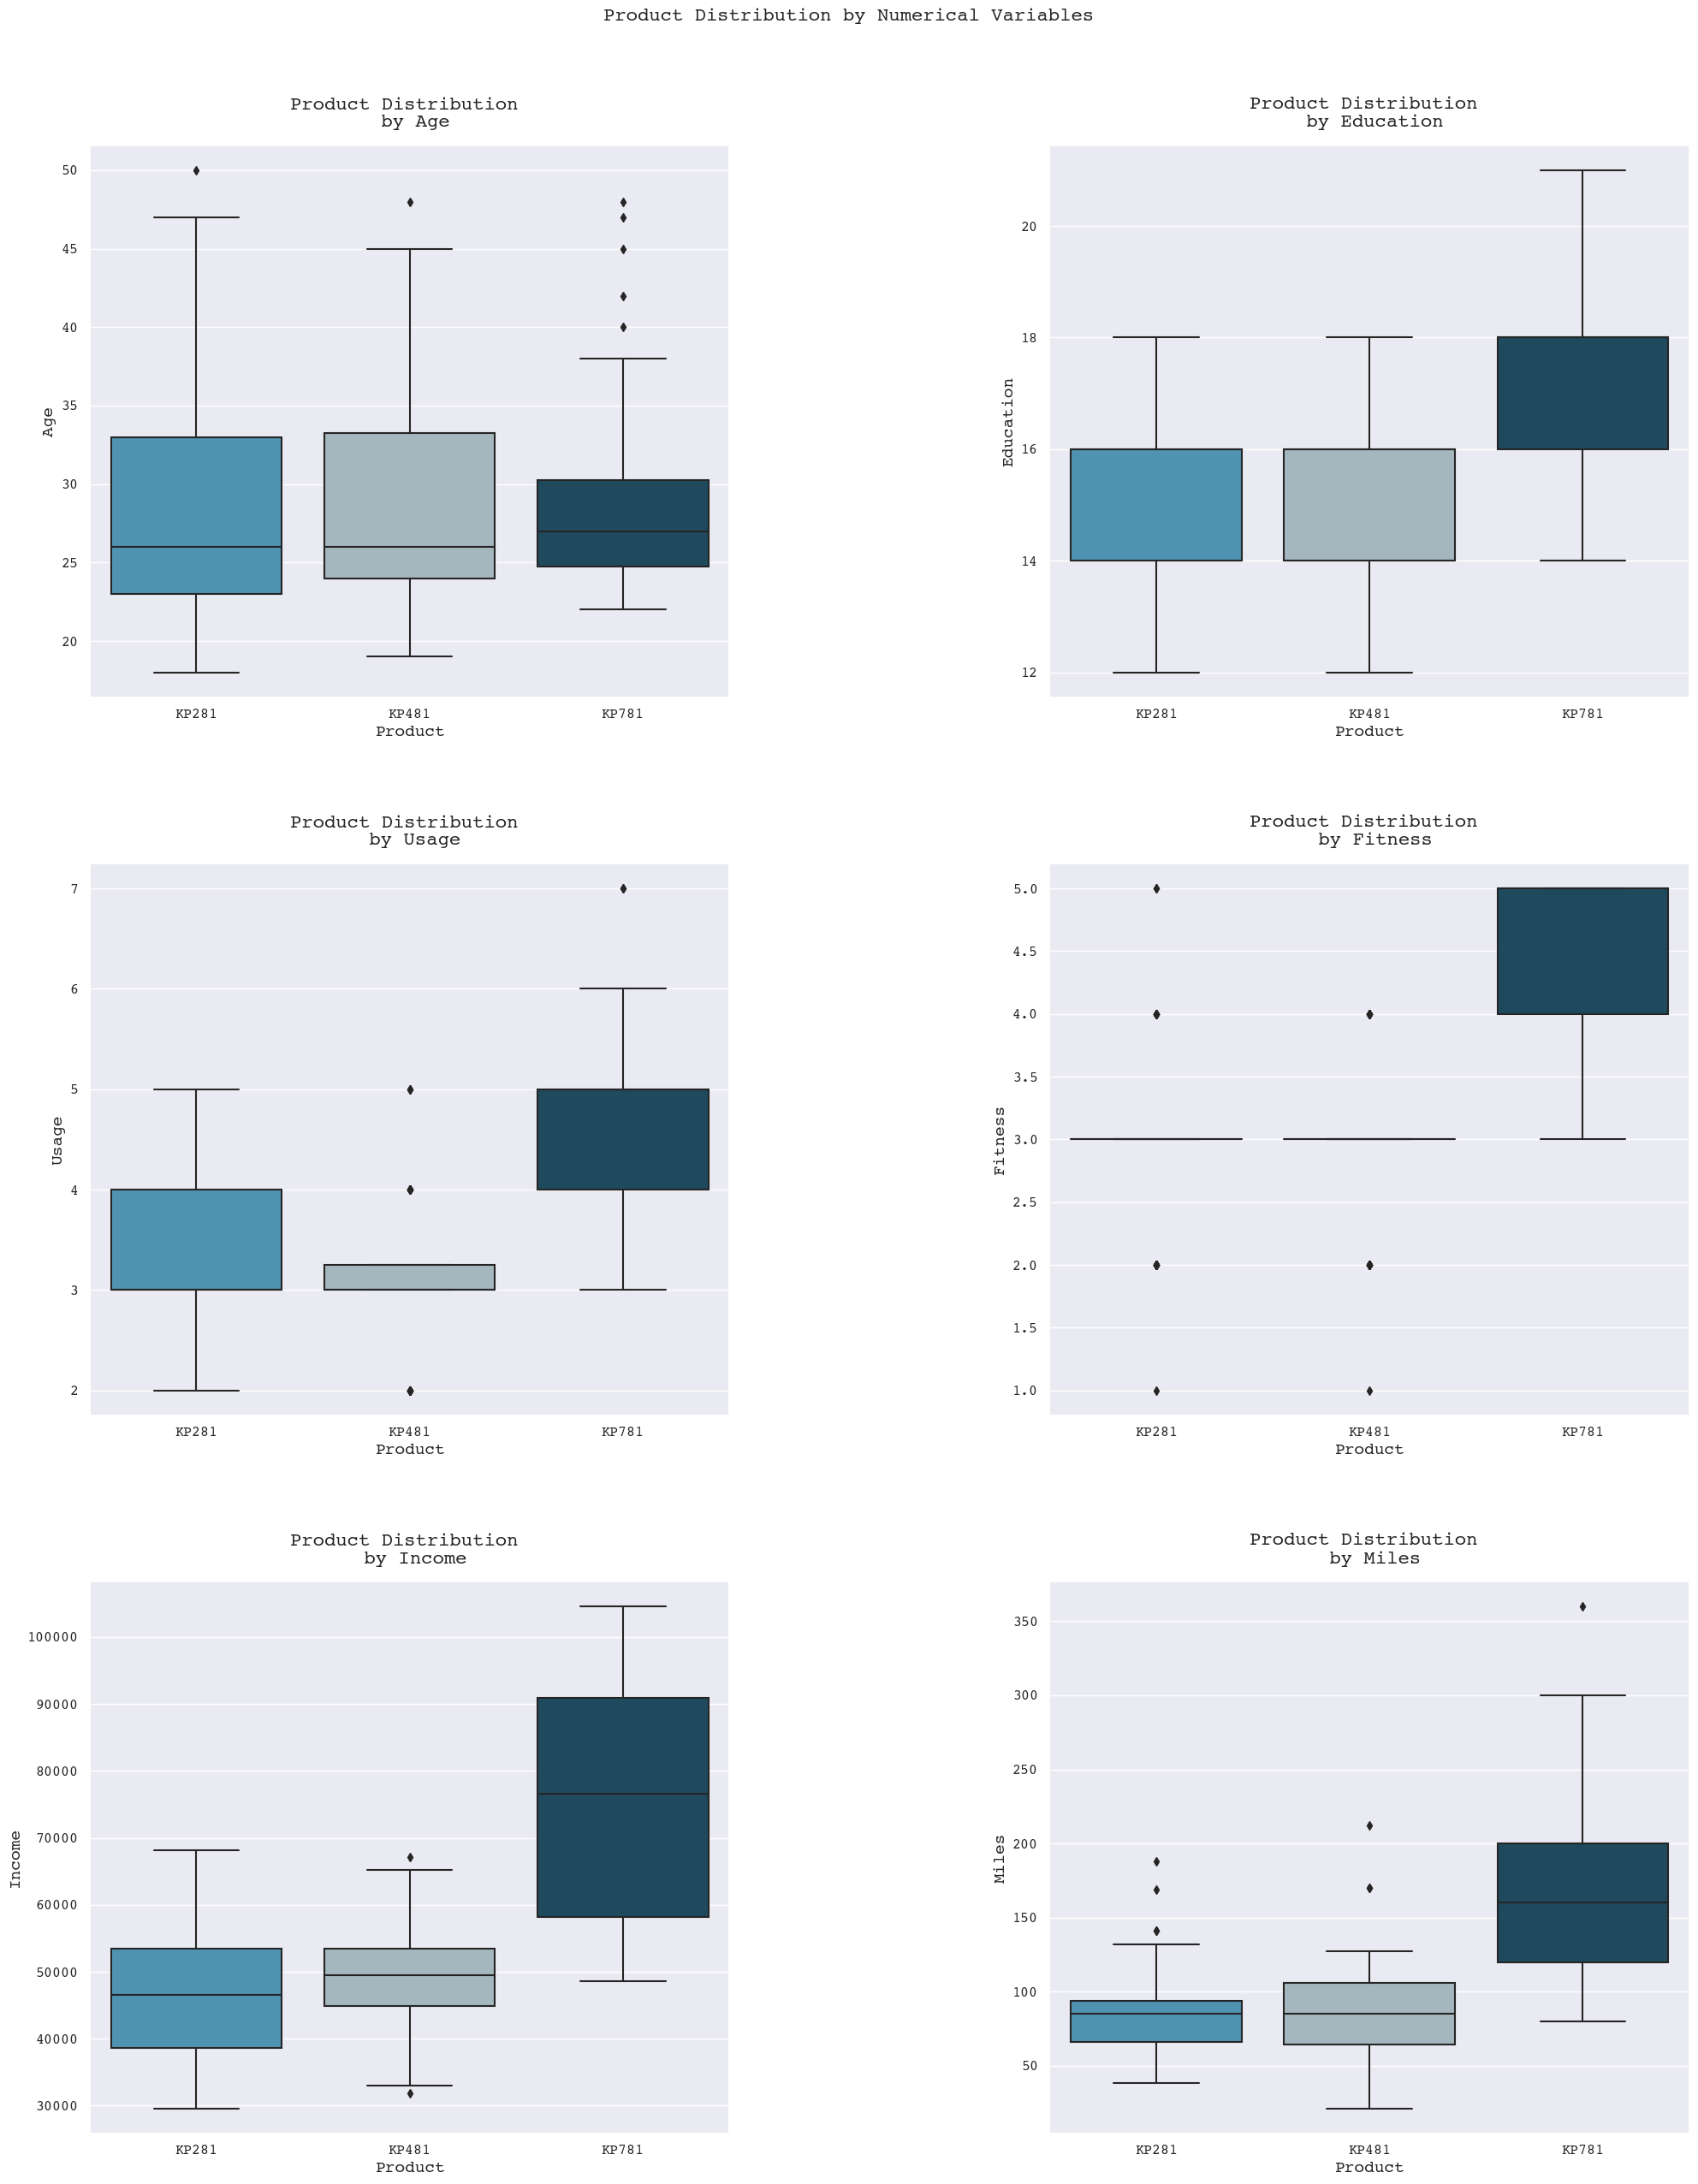

In [172]:
num_cols = df.select_dtypes(include='int64').columns
fig=plt.figure(figsize=(20,25)).suptitle("Product Distribution by Numerical Variables", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
    plt.subplot(3,2,i+1)
    sns.boxplot(x="Product", y=num_cols[i], data=df, palette=plot_palette)
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Product", fontsize = 14, fontname='Courier')
    plt.ylabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.title("Product Distribution \n by " + num_cols[i], y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.5) 
plt.show()

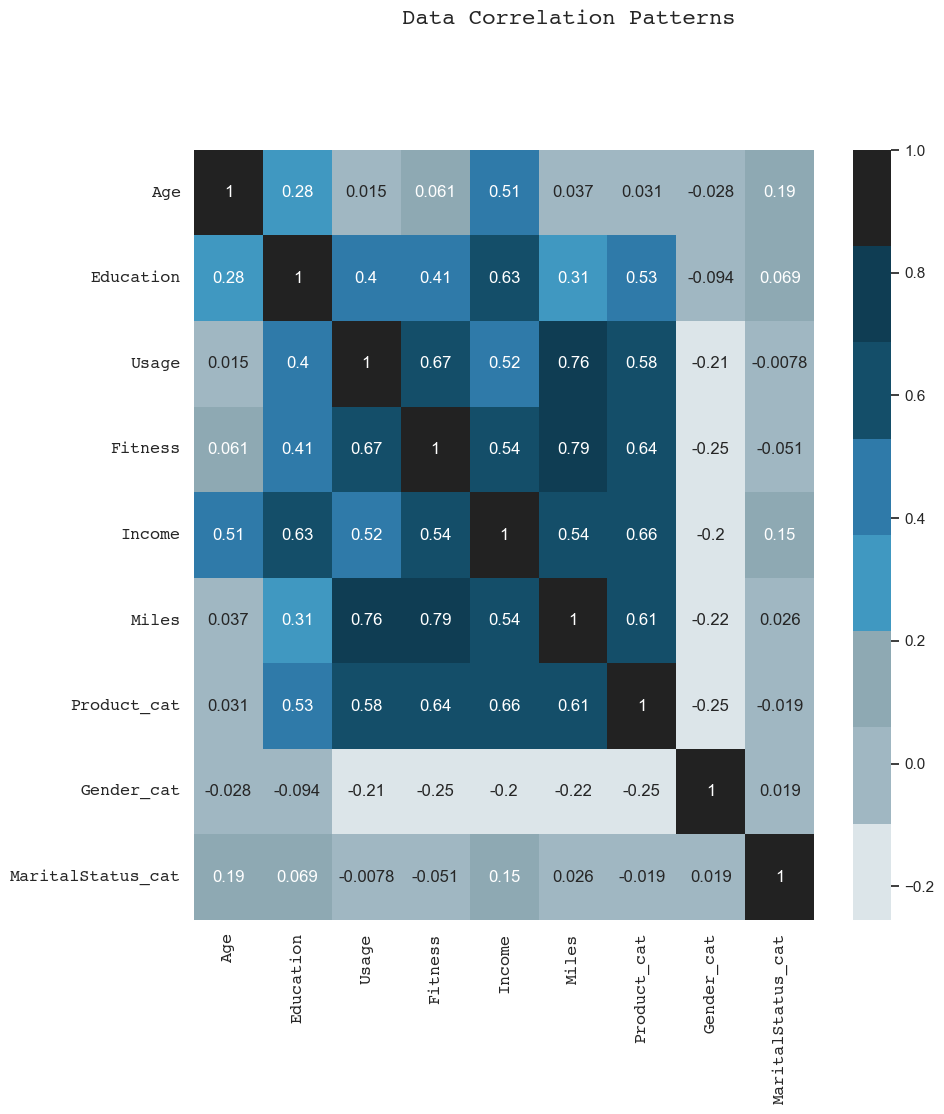

In [173]:
data_t = copy.deepcopy(df)
product_map = {
    "KP281" : "281",
    "KP481" : "481",
    "KP781" : "781"
}
gender_map = {
    "Male" : "0",
    "Female" : "1"
}
marital_status_map = {
    "Single" : "0",
    "Partnered" : "1"
}
#custom_colors = ["#4098C1", "#A0B7C2", "#144E69", "#222222", "#DCE5E9", "#2F7AA9", "#8EA9B3", "#0F3D53"]
custom_colors = ["#DCE5E9", "#A0B7C2", "#8EA9B3", "#4098C1", "#2F7AA9", "#144E69", "#0F3D53", "#222222"]

data_t["Product_cat"] = data_t["Product"].map(product_map).astype(int)
data_t["Gender_cat"] = data_t['Gender'].map(gender_map).astype(int)
data_t["MaritalStatus_cat"] = data_t['MaritalStatus'].map(marital_status_map).astype(int)

fig=plt.figure(figsize=(10,10)).suptitle("Data Correlation Patterns", y=1.02, fontsize = 16, fontname='Courier')
sns.heatmap(data_t.corr(), annot=True, cmap=mcolors.ListedColormap(custom_colors))
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.show()

<Figure size 1000x1000 with 0 Axes>

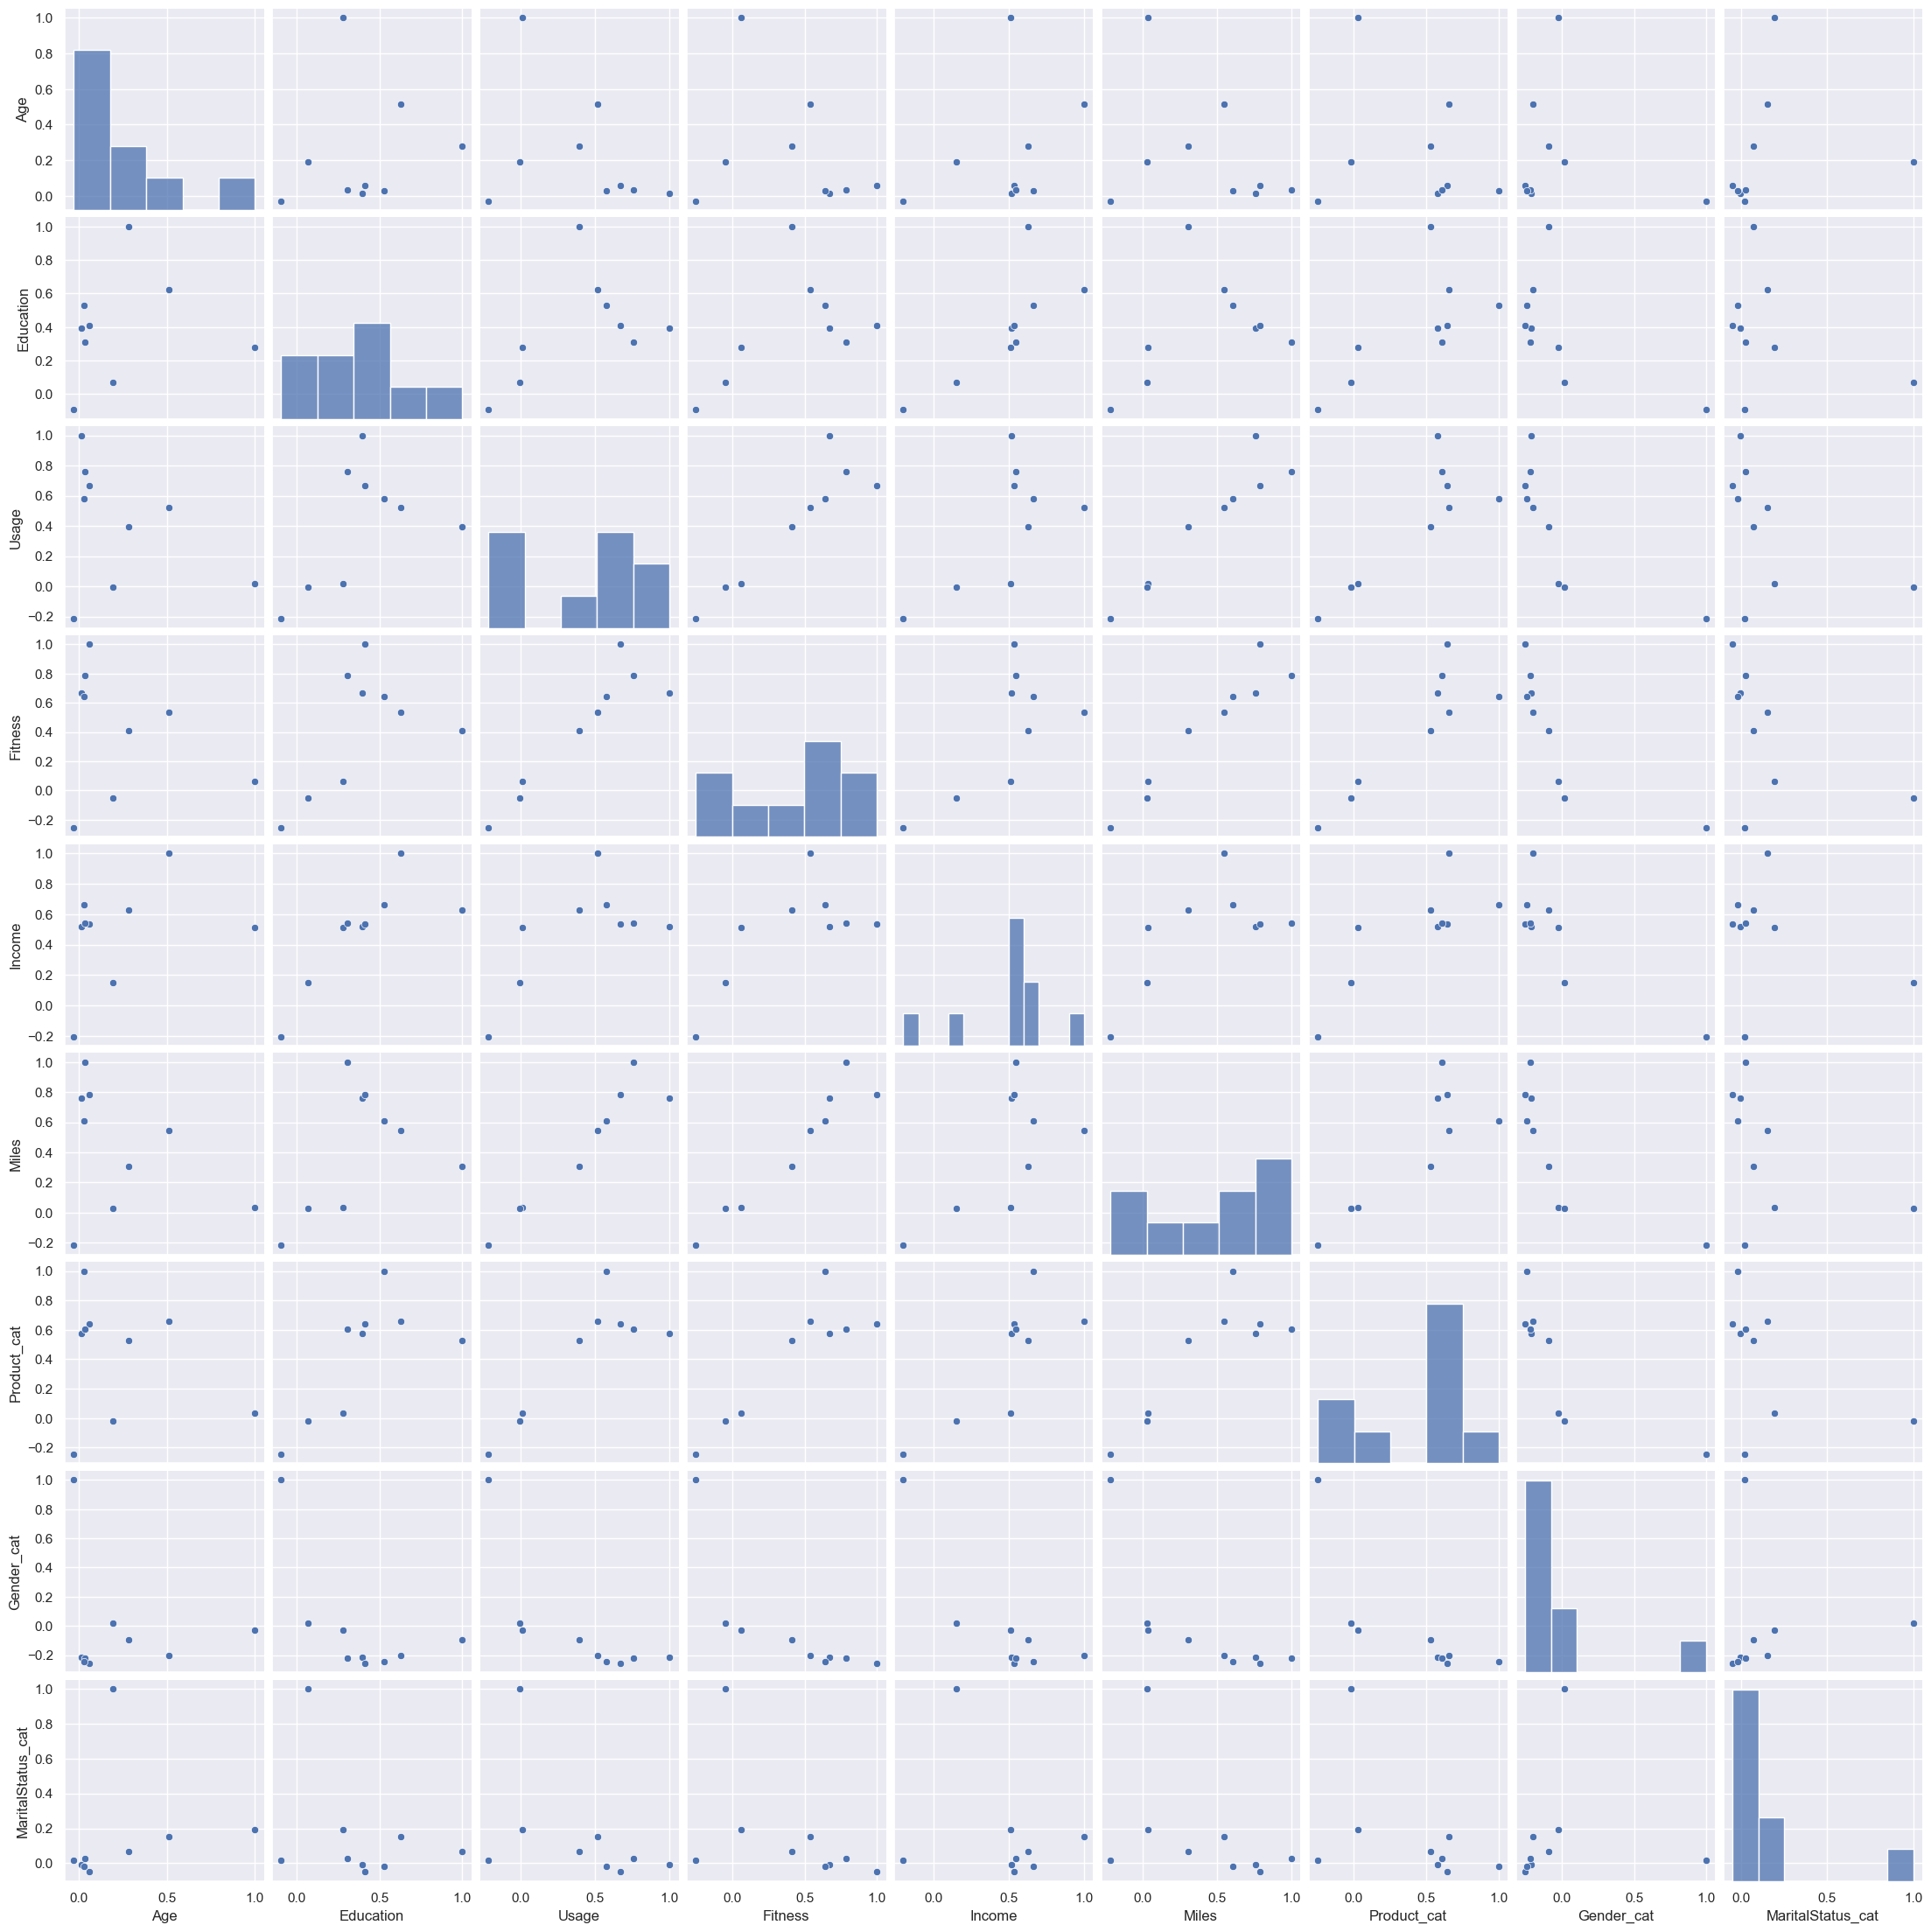

In [174]:
data_t = copy.deepcopy(df)
product_map = {
    "KP281" : "281",
    "KP481" : "481",
    "KP781" : "781"
}
gender_map = {
    "Male" : "0",
    "Female" : "1"
}
marital_status_map = {
    "Single" : "0",
    "Partnered" : "1"
}
#custom_colors = ["#4098C1", "#A0B7C2", "#144E69", "#222222", "#DCE5E9", "#2F7AA9", "#8EA9B3", "#0F3D53"]
custom_colors = ["#DCE5E9", "#A0B7C2", "#8EA9B3", "#4098C1", "#2F7AA9", "#144E69", "#0F3D53", "#222222"]

data_t["Product_cat"] = data_t["Product"].map(product_map).astype(int)
data_t["Gender_cat"] = data_t['Gender'].map(gender_map).astype(int)
data_t["MaritalStatus_cat"] = data_t['MaritalStatus'].map(marital_status_map).astype(int)

fig=plt.figure(figsize=(10,10)).suptitle("Data Correlation Patterns", y=1.02, fontsize = 16, fontname='Courier')
sns.pairplot(data_t.corr())


plt.show()

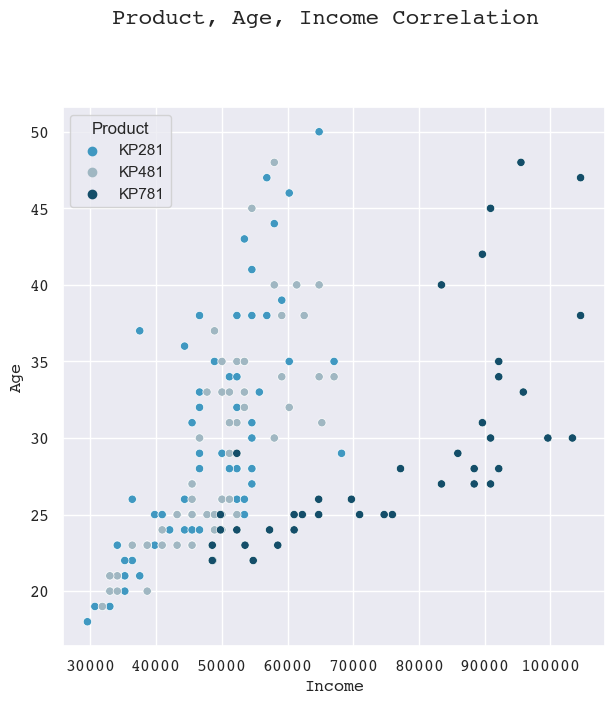

In [175]:
fig=plt.figure(figsize=(7,7)).suptitle("Product, Age, Income Correlation", y=1.02, fontsize = 16, fontname='Courier')
sns.scatterplot(x="Income", y="Age", hue="Product",data=df, palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Income",fontsize = 12, fontname='Courier')
plt.ylabel("Age",fontsize = 12, fontname='Courier')
plt.show()

In [176]:
np.shares_memory(df,data_t)

False

In [177]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [178]:
df.isna().sum().reset_index()

,index,0
0,Product,0
1,Age,0
2,Gender,0
3,Education,0
4,MaritalStatus,0
5,Usage,0
6,Fitness,0
7,Income,0
8,Miles,0


In [179]:
def get_outliers_data(df, series_name):
    q1 = np.percentile(df[series_name], 25)
    q3 = np.percentile(df[series_name], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df.loc[(df[series_name]<lower_bound) | (df[series_name]>upper_bound)]
    return outliers.reset_index().sort_values(series_name)

In [180]:
get_outliers_data(df,"Age")[["Age","Product"]].groupby("Product")["Age"].aggregate("count").reset_index().rename(columns={"Age": "Count"})

,Product,Count
0,KP281,2
1,KP481,1
2,KP781,2


In [181]:
get_outliers_data(df,"Education")[["Education","Product"]].groupby("Product")["Education"].aggregate("count").reset_index().rename(columns={"Education": "Count"})

,Product,Count
0,KP781,4


In [182]:
get_outliers_data(df,"Usage")[["Usage","Product"]].groupby("Product")["Usage"].aggregate("count").reset_index().rename(columns={"Usage": "Count"})

,Product,Count
0,KP781,9


In [183]:
get_outliers_data(df,"Fitness")[["Fitness","Product"]].groupby("Product")["Fitness"].aggregate("count").reset_index().rename(columns={"Fitness": "Count"})

,Product,Count
0,KP281,1
1,KP481,1


In [184]:
get_outliers_data(df,"Income")[["Income","Product"]].groupby("Product")["Income"].aggregate("count").reset_index().rename(columns={"Income": "Count"})

,Product,Count
0,KP781,19


In [185]:
get_outliers_data(df,"Miles")[["Miles","Product"]].groupby("Product")["Miles"].aggregate("count").reset_index().rename(columns={"Miles": "Count"})

,Product,Count
0,KP281,1
1,KP481,1
2,KP781,11


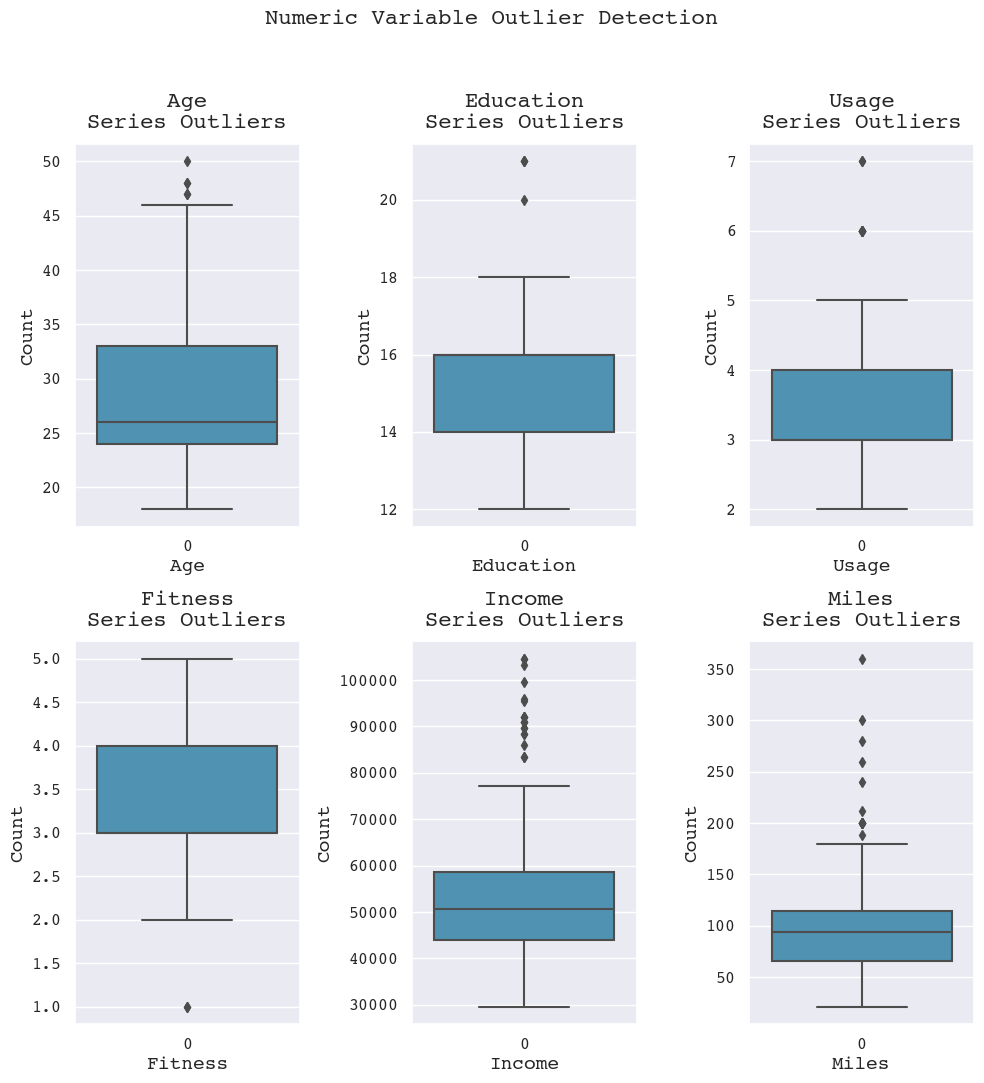

In [186]:
num_cols = df.select_dtypes(include='int64').columns
fig=plt.figure(figsize=(10,15)).suptitle("Numeric Variable Outlier Detection", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[num_cols[i]], color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title(num_cols[i]+"\nSeries Outliers", y=1.02, fontsize = 16, fontname='Courier')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [187]:
def get_probability_df(event, sample_space, df):
    cross_tab = pd.crosstab(df[event], df[sample_space], margins=True)
    data_t = pd.DataFrame()
    cols = [cross_tab.columns.name,cross_tab.index.name, "Probability"]
    data_list = []
    for col in cross_tab.columns:
        for row in cross_tab.index:
            if row != "All" and col !="All":
                t = [col, row, round((cross_tab.loc[row,col]/cross_tab.loc["All",col])*100,2)]
                data_list.append(t)
    data_t = pd.DataFrame(data_list, columns=cols)
    return data_t
    

In [188]:
get_probability_df("Gender","Product", df)

,Product,Gender,Probability
0,KP281,Female,50.00
1,KP281,Male,50.00
2,KP481,Female,48.33
3,KP481,Male,51.67
4,KP781,Female,17.50
5,KP781,Male,82.50


In [189]:
get_probability_df("Education","Product", df)

,Product,Education,Probability
0,KP281,12,2.50
1,KP281,13,3.75
2,KP281,14,37.50
3,KP281,15,5.00
4,KP281,16,48.75
5,KP281,18,2.50
6,KP281,20,0.00
7,KP281,21,0.00
8,KP481,12,1.67
9,KP481,13,3.33


In [190]:
get_probability_df("MaritalStatus","Product", df)

,Product,MaritalStatus,Probability
0,KP281,Partnered,60.0
1,KP281,Single,40.0
2,KP481,Partnered,60.0
3,KP481,Single,40.0
4,KP781,Partnered,57.5
5,KP781,Single,42.5


In [191]:
get_probability_df("Usage","Product", df)

,Product,Usage,Probability
0,KP281,2,23.75
1,KP281,3,46.25
2,KP281,4,27.50
3,KP281,5,2.50
4,KP281,6,0.00
5,KP281,7,0.00
6,KP481,2,23.33
7,KP481,3,51.67
8,KP481,4,20.00
9,KP481,5,5.00


In [192]:
get_probability_df("Fitness","Product", df)

,Product,Fitness,Probability
0,KP281,1,1.25
1,KP281,2,17.50
2,KP281,3,67.50
3,KP281,4,11.25
4,KP281,5,2.50
5,KP481,1,1.67
6,KP481,2,20.00
7,KP481,3,65.00
8,KP481,4,13.33
9,KP481,5,0.00


In [193]:
age_bins = [10, 20, 30, 40, 50]
age_labels=["10-20", "21-30", "31-40", "41-50"]
data_t = copy.deepcopy(df)
data_t["age_range"] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
get_probability_df("age_range", "Product", data_t)

,Product,age_range,Probability
0,KP281,10-20,7.50
1,KP281,21-30,61.25
2,KP281,31-40,23.75
3,KP281,41-50,7.50
4,KP481,10-20,6.67
5,KP481,21-30,51.67
6,KP481,31-40,38.33
7,KP481,41-50,3.33
8,KP781,10-20,0.00
9,KP781,21-30,75.00


In [194]:
income_bins = [25000, 45000, 65000, 85000, 105000]
income_labels=['25000-45000', '45001-65000', '65001-85000', '85001-105000']
data_t = copy.deepcopy(df)
data_t["income_range"] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
get_probability_df("income_range", "Product", data_t)

,Product,income_range,Probability
0,KP281,25000-45000,42.50
1,KP281,45001-65000,55.00
2,KP281,65001-85000,2.50
3,KP281,85001-105000,0.00
4,KP481,25000-45000,25.00
5,KP481,45001-65000,71.67
6,KP481,65001-85000,3.33
7,KP481,85001-105000,0.00
8,KP781,25000-45000,0.00
9,KP781,45001-65000,40.00


In [195]:
miles_bins = [20, 70, 120, 170, 220, 270, 320]
miles_labels=["20-70", "71-120", "121-170", "171-220", "221-270", "271-320"]
data_t = copy.deepcopy(df)
data_t["miles_range"] = pd.cut(df['Miles'], bins=miles_bins, labels=miles_labels)
get_probability_df("miles_range", "Product", data_t)

,Product,miles_range,Probability
0,KP281,20-70,35.00
1,KP281,71-120,57.50
2,KP281,121-170,6.25
3,KP281,171-220,1.25
4,KP281,221-270,0.00
5,KP281,271-320,0.00
6,KP481,20-70,30.00
7,KP481,71-120,56.67
8,KP481,121-170,11.67
9,KP481,171-220,1.67


In [196]:
def get_conditional_probability_df(event, sample_space, df):
    cross_tab = pd.crosstab(df[event], df[sample_space])
    data_t = pd.DataFrame()
    cols = [cross_tab.index.name, cross_tab.columns.name, "Conditional Probability"]
    data_list = []
    for col in cross_tab.columns:
        for row in cross_tab.index:
            t = [row, col, round((cross_tab.loc[row,col]/cross_tab.loc[row].sum())*100,2)]
            data_list.append(t)
    data_t = pd.DataFrame(data_list, columns=cols)
    return data_t.sort_values(by=[event, "Conditional Probability"], ascending=[True,False])
    

In [197]:
get_conditional_probability_df("Gender","Product",df)

,Gender,Product,Conditional Probability
0,Female,KP281,52.63
2,Female,KP481,38.16
4,Female,KP781,9.21
1,Male,KP281,38.46
5,Male,KP781,31.73
3,Male,KP481,29.81


In [198]:
get_conditional_probability_df("Education","Product", df)

,Education,Product,Conditional Probability
0,12,KP281,66.67
8,12,KP481,33.33
16,12,KP781,0.00
1,13,KP281,60.00
9,13,KP481,40.00
17,13,KP781,0.00
2,14,KP281,54.55
10,14,KP481,41.82
18,14,KP781,3.64
3,15,KP281,80.00


In [199]:
get_conditional_probability_df("MaritalStatus","Product", df)

,MaritalStatus,Product,Conditional Probability
0,Partnered,KP281,44.86
2,Partnered,KP481,33.64
4,Partnered,KP781,21.50
1,Single,KP281,43.84
3,Single,KP481,32.88
5,Single,KP781,23.29


In [200]:
get_conditional_probability_df("Usage","Product", df)

,Usage,Product,Conditional Probability
0,2,KP281,57.58
6,2,KP481,42.42
12,2,KP781,0.00
1,3,KP281,53.62
7,3,KP481,44.93
13,3,KP781,1.45
2,4,KP281,42.31
14,4,KP781,34.62
8,4,KP481,23.08
15,5,KP781,70.59


In [201]:
get_conditional_probability_df("Fitness","Product", df)

,Fitness,Product,Conditional Probability
0,1,KP281,50.00
5,1,KP481,50.00
10,1,KP781,0.00
1,2,KP281,53.85
6,2,KP481,46.15
11,2,KP781,0.00
2,3,KP281,55.67
7,3,KP481,40.21
12,3,KP781,4.12
3,4,KP281,37.50


In [202]:
age_bins = [10, 20, 30, 40, 50]
age_labels=["10-20", "21-30", "31-40", "41-50"]
data_t = copy.deepcopy(df)
data_t["age_range"] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
get_conditional_probability_df("age_range", "Product", data_t)

,age_range,Product,Conditional Probability
0,10-20,KP281,60.00
4,10-20,KP481,40.00
8,10-20,KP781,0.00
1,21-30,KP281,44.55
5,21-30,KP481,28.18
9,21-30,KP781,27.27
6,31-40,KP481,47.92
2,31-40,KP281,39.58
10,31-40,KP781,12.50
3,41-50,KP281,50.00


In [203]:
income_bins = [25000, 45000, 65000, 85000, 105000]
income_labels=['25000-45000', '45001-65000', '65001-85000', '85001-105000']
data_t = copy.deepcopy(df)
data_t["income_range"] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
get_conditional_probability_df("income_range", "Product", data_t)

,income_range,Product,Conditional Probability
0,25000-45000,KP281,69.39
4,25000-45000,KP481,30.61
8,25000-45000,KP781,0.00
1,45001-65000,KP281,42.72
5,45001-65000,KP481,41.75
9,45001-65000,KP781,15.53
10,65001-85000,KP781,63.64
2,65001-85000,KP281,18.18
6,65001-85000,KP481,18.18
11,85001-105000,KP781,100.00


In [204]:
miles_bins = [20, 70, 120, 170, 220, 270, 320]
miles_labels=["20-70", "71-120", "121-170", "171-220", "221-270", "271-320"]
data_t = copy.deepcopy(df)
data_t["miles_range"] = pd.cut(df['Miles'], bins=miles_bins, labels=miles_labels)
get_conditional_probability_df("miles_range", "Product", data_t)

,miles_range,Product,Conditional Probability
14,121-170,KP781,47.83
8,121-170,KP481,30.43
2,121-170,KP281,21.74
15,171-220,KP781,85.71
3,171-220,KP281,7.14
9,171-220,KP481,7.14
0,20-70,KP281,60.87
6,20-70,KP481,39.13
12,20-70,KP781,0.00
16,221-270,KP781,100.00


#### END OF PROJECT